# EDA RECUPERACIÓN 
## Centros Especialización New York
Existen varios centros especializados de educación (alto rendimiento) en la ciudad de Nueva York, a los que pueden acceder estudiantes tras superar el colegio. En estos centros se ofrece a los alumnos asignaturas avanzadas en arte, música o matemáticas.

El acceso a los centros de especialización ha sido siempre motivo de debate en al ciudad, puesto que se presupone que existe un trato favorable a estudiantes de raza blanca, en detrimento de latinos y negros.

¿Cómo es el proceso de admisión? Lo primero, los alumnos eligen los centros en un ranking. Después realizan un examen (SHSAT), y en función de una notas de corte, se reparten los estudiantes en los distintos centros. Las notas las establece cada centro, y cambian todos los años, dependiendo de la cantidad de plazas disponibles y el número de aplicaciones. **El problema reside en que no se publican esas notas de corte**, y se sospecha que los criterios no san tan objetivos.

[Noticia NYTimes](https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html)

Por tanto, nos encontramos ante la siguiente problemática:
1. Bajo número de estudiantes negros y latinos en centros de especialización
2. Sólo el 10% de los colegios de Nueva York reciben ofertas de centros de especialización, aún habiendo un 67% de estudiantes negros y latinos en Nueva York.
3. Los asiáticos suponen un 62% de los estudiantes de los centros de especialización, aún habiendo únicamente un 16% de estudiantes asiáticos en los colegios.
4. Los blancos suponen un 24% de los estudiantes de los centros de especialización, aún habiendo únicamente un 15% de estudiantes blancos en los colegios.

**El objetivo de este ejecicio es realizar un análisis exploratorio de datos para determinar el estado de las ayudas y necesidades de los colegios de Nueva York, y con ello poder tomar decisiones BASADAS EN LOS DATOS. Para el análisis utilizarás datos como las localizaciones geográficas de los colegios, pertenencia comunitaria, raza de los estudiantes y nivel académico.**

Por tanto, consideraremos las siguientes hipótesis que habrá que razonar con los datos disponibles:
1. Si un colegio pertenece o no a una comunidad tiene impacto en las ayudas económicas recibidas.
2. Hay centros con mayoría de estudiantes hispanos o negros que tienen más necesidades económicas que los centros con mayoría de raza blanca.
3. La localización de los colegios está afectando a las ayudas.
4. Los centros con mayores necesidades tienen un % de asistencia a clase más bajo.



<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Map_of_New_York_Economic_Regions.svg/2000px-Map_of_New_York_Economic_Regions.svg.png'/>

In [ ]:
# 1.- Western New York
# 2.- Finger Lakes
# 3.- Southern Tier
# 4.- Central New York
# 5.- North Country
# 6.- Mohawk Valley
# 7.- Capital District
# 8.- Hudson Valley
# 9.- New York City
# 10.- Long Island

Para contrastar estas hipótesis, tendrás que llevar a cabo los siguientes pasos en la analítica. Comenta qué observas en cada punto

1. Leer los datasets, haz las limpiezas pertinentes y obtén sus estadísticos básicos.

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [317]:
from plotly.offline import init_notebook_mode, iplot, plot

In [309]:
# Cargamos los ficheros en un df.

df_schools = pd.read_csv("data/2016 School Explorer.csv", sep=",")
df_registrations = pd.read_csv("data/D5 SHSAT Registrations and Testers.csv", sep=",")

# SHSAT
# La prueba Specialized High Schools Admissions Test (SHSAT) es un examen para estudiantes del octavo y noveno grado que residen en la ciudad de Nueva York, 
# y se utiliza para determinar la admisión a todas excepto a una de las escuelas especializada de preparatoria o bachillerato de la ciudad (Specialized High Schools).

In [ ]:
df_schools.info()

# Hay tantas columnas que muestra solo la primera y la última. Más adelante lo desglosamos.

In [ ]:
df_schools.describe()

In [ ]:
df_registrations.info()

In [ ]:
df_registrations.describe()

In [310]:
df_registrations.reset_index(inplace=True)

**DF SCHOOLS - COLUMNAS COMUNES**

In [311]:
# Desglosamos el df schools y lo indexamos

df_schools_ini = df_schools.iloc[:, :41]
df_schools_ini.reset_index(inplace=True)

In [189]:
df_schools.shape

(1272, 161)

In [ ]:
pd.set_option('display.max_columns', None)  
df_schools.head()

In [ ]:
# index                                     # índice
# Adjusted Grade                            # Grado ajustado
# New?                                      # ¿Nuevo?
# Other Location Code in LCGMS              # Otro código de ubicación en LCGMS
# School Name                               # Nombre de escuela
# SED Code                                  # Código SED
# Location Code                             # Código de localización
# District                                  # Distrito
# Latitude                                  # Latitud
# Longitude                                 # Longitud
# Address (Full)                            # Dirección (completa)
# City                                      # Ciudad
# Zip                                       # Cremallera
# Grades                                    # Los grados
# Grade Low                                 # Grado Bajo
# Grade High                                # Grado Alto
# Community School?                         # ¿Escuela comunitária?
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares
# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco
# Student Attendance Rate                   # Tasa de asistencia estudiantil
# Percent of Students Chronically Absent    # Porcentaje de Estudiantes Crónicamente Ausentes
# Rigorous Instruction %                    # Instrucción rigurosa %
# Rigorous Instruction Rating               # Calificación de instrucción rigurosa
# Collaborative Teachers %                  # Docentes colaborativos %
# Collaborative Teachers Rating             # Calificación de maestros colaborativos
# Supportive Environment %                  # Ambiente de apoyo %
# Supportive Environment Rating             # Calificación de entorno de apoyo
# Effective School Leadership %             # Liderazgo escolar efectivo %
# Effective School Leadership Rating        # Calificación de liderazgo escolar efectivo
# Strong Family-Community Ties %            # Fuertes lazos familia-comunidad %
# Strong Family-Community Ties Rating       # Fuertes lazos entre la familia y la comunidad Calificación
# Trust %                                   # Confianza %
# Trust Rating                              # Clasificación de confianza
# Student Achievement Rating                # Calificación de rendimiento estudiantil
# Average ELA Proficiency                   # Dominio promedio de ELA
# Average Math Proficiency                  # Competencia matemática promedio

list(df_schools_ini.columns)

In [ ]:
# Adjusted Grade                            # Grado ajustado
# New?                                      # ¿Nuevo?
# Other Location Code in LCGMS              # Otro código de ubicación en LCGMS
# School Name                               # Nombre de escuela
# SED Code                                  # Código SED
# Location Code                             # Código de localización
# District                                  # Distrito
# Latitude                                  # Latitud
# Longitude                                 # Longitud
# Address (Full)                            # Dirección (completa)
# City                                      # Ciudad
# Zip                                       # Cremallera
# Grades                                    # Los grados
# Grade Low                                 # Grado Bajo
# Grade High                                # Grado Alto
# Community School?                         # ¿Escuela comunitária?
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares

df_schools_ini.iloc[:, :19].head(2)

In [ ]:
# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco
# Student Attendance Rate                   # Tasa de asistencia estudiantil
# Percent of Students Chronically Absent    # Porcentaje de Estudiantes Crónicamente Ausentes
# Rigorous Instruction %                    # Instrucción rigurosa %
# Rigorous Instruction Rating               # Calificación de instrucción rigurosa
# Collaborative Teachers %                  # Docentes colaborativos %

df_schools_ini.iloc[:, 19:30].head(2)

In [ ]:
# Collaborative Teachers Rating             # Calificación de maestros colaborativos
# Supportive Environment %                  # Ambiente de apoyo %
# Supportive Environment Rating             # Calificación de entorno de apoyo
# Effective School Leadership %             # Liderazgo escolar efectivo %
# Effective School Leadership Rating        # Calificación de liderazgo escolar efectivo
# Strong Family-Community Ties %            # Fuertes lazos familia-comunidad %
# Strong Family-Community Ties Rating       # Fuertes lazos entre la familia y la comunidad Calificación
# Trust %                                   # Confianza %
# Trust Rating                              # Clasificación de confianza
# Student Achievement Rating                # Calificación de rendimiento estudiantil
# Average ELA Proficiency                   # Dominio promedio de ELA
# Average Math Proficiency                  # Competencia matemática promedio

df_schools_ini.iloc[:, 30:42].head(2)

**DF SCHOOLS - GRADES**

In [6]:
# Desglosamos el df schools y los indexamos

df_esc_gra_3 = df_schools.iloc[:, 41:61] # Grade 3
df_esc_gra_3.reset_index(inplace=True)

df_esc_gra_4 = df_schools.iloc[:, 61:81] # Grade 4
df_esc_gra_4.reset_index(inplace=True)

df_esc_gra_5 = df_schools.iloc[:, 81:101] # Grade 5
df_esc_gra_5.reset_index(inplace=True)

df_esc_gra_6 = df_schools.iloc[:, 101:121] # Grade 6
df_esc_gra_6.reset_index(inplace=True)

df_esc_gra_7 = df_schools.iloc[:, 121:141] # Grade 7
df_esc_gra_7.reset_index(inplace=True)

df_esc_gra_8 = df_schools.iloc[:, 141:161] # Grade 8
df_esc_gra_8.reset_index(inplace=True)

In [ ]:
# ELA - English Language Arts                           # ELA - Ingles Lenguaje Artes
# Grade 3 ELA - All Students Tested                     # ELA de 3er grado - Todos los estudiantes evaluados
# Grade 3 ELA 4s - All Students                         # Grado 3 ELA 4s - Todos los estudiantes
# Grade 3 ELA 4s - American Indian or Alaska Native     # Grado 3 ELA 4s - Indio americano o nativo de Alaska
# Grade 3 ELA 4s - Black or African American            # Grado 3 ELA 4s - Negro o afroamericano
# Grade 3 ELA 4s - Hispanic or Latino                   # Grado 3 ELA 4s - Hispano o Latino
# Grade 3 ELA 4s - Asian or Pacific Islander            # Grado 3 ELA 4s - Asiático o Isleño del Pacífico
# Grade 3 ELA 4s - White                                # Grado 3 ELA 4s - Blanco
# Grade 3 ELA 4s - Multiracial                          # Grado 3 ELA 4s - Multirracial
# Grade 3 ELA 4s - Limited English Proficient           # Grado 3 ELA 4s - Dominio limitado del inglés
# Grade 3 ELA 4s - Economically Disadvantaged           # Grado 3 ELA 4s - Económicamente en desventaja

# Grade 3 Math - All Students tested                    # Matemáticas de grado 3 - Todos los estudiantes evaluados
# Grade 3 Math 4s - All Students                        # Grado 3 Matemáticas 4s - Todos los estudiantes
# Grade 3 Math 4s - American Indian or Alaska Native    # Grado 3 Matemáticas 4s - Indio Americano o Nativo de Alaska
# Grade 3 Math 4s - Black or African American           # Grado 3 Matemáticas 4s - Negro o afroamericano
# Grade 3 Math 4s - Hispanic or Latino                  # Grado 3 Matemáticas 4s - Hispano o Latino
# Grade 3 Math 4s - Asian or Pacific Islander           # Grado 3 Matemáticas 4s - Asiático o Isleño del Pacífico
# Grade 3 Math 4s - White                               # Grado 3 Matemáticas 4s - Blanco
# Grade 3 Math 4s - Multiracial                         # Grado 3 Matemáticas 4s - Multirracial
# Grade 3 Math 4s - Limited English Proficient          # Grado 3 Matemáticas 4s - Dominio limitado del inglés
# Grade 3 Math 4s - Economically Disadvantaged          # Grado 3 Matemáticas 4s - Económicamente en desventaja

list(df_esc_gra_3.columns)

In [ ]:
# ELA - English Language Arts                           # ELA - Ingles Lenguaje Artes
# Grade 3 ELA - All Students Tested                     # ELA de 3er grado - Todos los estudiantes evaluados
# Grade 3 ELA 4s - All Students                         # Grado 3 ELA 4s - Todos los estudiantes
# Grade 3 ELA 4s - American Indian or Alaska Native     # Grado 3 ELA 4s - Indio americano o nativo de Alaska
# Grade 3 ELA 4s - Black or African American            # Grado 3 ELA 4s - Negro o afroamericano
# Grade 3 ELA 4s - Hispanic or Latino                   # Grado 3 ELA 4s - Hispano o Latino
# Grade 3 ELA 4s - Asian or Pacific Islander            # Grado 3 ELA 4s - Asiático o Isleño del Pacífico
# Grade 3 ELA 4s - White                                # Grado 3 ELA 4s - Blanco
# Grade 3 ELA 4s - Multiracial                          # Grado 3 ELA 4s - Multirracial
# Grade 3 ELA 4s - Limited English Proficient           # Grado 3 ELA 4s - Dominio limitado del inglés
# Grade 3 ELA 4s - Economically Disadvantaged           # Grado 3 ELA 4s - Económicamente en desventaja

df_esc_gra_3.iloc[:, :11].head(2) # Grade 3

In [ ]:
# Grade 3 Math - All Students tested                    # Matemáticas de grado 3 - Todos los estudiantes evaluados
# Grade 3 Math 4s - All Students                        # Grado 3 Matemáticas 4s - Todos los estudiantes
# Grade 3 Math 4s - American Indian or Alaska Native    # Grado 3 Matemáticas 4s - Indio Americano o Nativo de Alaska
# Grade 3 Math 4s - Black or African American           # Grado 3 Matemáticas 4s - Negro o afroamericano
# Grade 3 Math 4s - Hispanic or Latino                  # Grado 3 Matemáticas 4s - Hispano o Latino
# Grade 3 Math 4s - Asian or Pacific Islander           # Grado 3 Matemáticas 4s - Asiático o Isleño del Pacífico
# Grade 3 Math 4s - White                               # Grado 3 Matemáticas 4s - Blanco
# Grade 3 Math 4s - Multiracial                         # Grado 3 Matemáticas 4s - Multirracial
# Grade 3 Math 4s - Limited English Proficient          # Grado 3 Matemáticas 4s - Dominio limitado del inglés
# Grade 3 Math 4s - Economically Disadvantaged          # Grado 3 Matemáticas 4s - Económicamente en desventaja

df_esc_gra_3.iloc[:, 11:].head(2) # Grade 3

**DF SCHOOLS - COLUMNAS COMUNES - ANALISIS**

In [ ]:
# School Name                               # Nombre de escuela

# Location Code (Open Location Code (OLC))  # Código de localización (códigos plus) - sistema de geocodificación para identificar un área en cualquier lugar de la Tierra. Se basa en latitudes y longitudes
# District                                  # Distrito
# Latitude                                  # Latitud
# Longitude                                 # Longitud
# Address (Full)                            # Dirección (completa)
# City                                      # Ciudad
# Zip                                       # Código Postal

# Community School?                         # ¿Escuela comunitária?
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares

# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco

# Student Attendance Rate                   # Tasa de asistencia estudiantil
# Percent of Students Chronically Absent    # Porcentaje de Estudiantes Crónicamente Ausentes

# Student Achievement Rating                # Calificación de rendimiento estudiantil
# Average ELA Proficiency                   # Dominio promedio de ELA
# Average Math Proficiency                  # Competencia matemática promedio


# Community School --> A partir del otoño de 2014, 45 escuelas se convirtieron en Escuelas Comunitarias de la Ciudad de Nueva York como parte de una subvención para mejorar la asistencia y prevenir la deserción escolar en asociación con United Way NYC. 
# En el año escolar 2022-23, hay 421 escuelas comunitarias en todos los distritos de la ciudad de Nueva York, financiadas con dólares municipales, estatales y federales.


In [ ]:
df_schools_ini['District'].unique() # 32
df_schools_ini['City'].unique() # 45

df_schools_ini['Community School?'].unique() # 'Yes', 'No'

df_schools_ini['Economic Need Index'].unique() # %
df_schools_ini['School Income Estimate'].unique() # $

df_schools_ini['Student Attendance Rate'].unique() # %
df_schools_ini['Percent of Students Chronically Absent'].unique() # %

df_schools_ini['Student Achievement Rating'].unique() # 'Approaching Target', 'Exceeding Target', 'Meeting Target', 'Not Meeting Target', nan
                                                      # 'Acercándose al objetivo', 'Excediendo el objetivo', 'Alcanzando el objetivo', 'No cumplir el objetivo', nan
df_schools_ini['Average ELA Proficiency'].unique() # AVG
df_schools_ini['Average Math Proficiency'].unique() # AVG

df_schools_ini['Percent ELL'].unique() # %


df_schools_ini['Average Math Proficiency'].unique()


In [ ]:
df_schools_ini[['Address (Full)', 'City', 'Zip', 'District', 'Location Code', 'School Income Estimate', 'Economic Need Index', 'Community School?', 'Grade High', 'Grade Low', 'Grades']][df_schools_ini['City'] == "JAMAICA"]

In [ ]:
# Agrupamos por ciudad y distrito

df_schools_ini_city_dist = df_schools_ini.groupby(['City', 'District'])['index'].agg(['count']).sort_values(by=['District'])

df_schools_ini_city_dist.iloc[:30, :]

In [ ]:
# Mostramos del 30 hasta el final (77)

df_schools_ini_city_dist.iloc[30:, :]

**DF SCHOOLS - GRADES - ANALISIS**

In [89]:
df_esc_gra_3['Grade 3 ELA 4s - Economically Disadvantaged'].unique() # Económicamente en desventaja

array([ 0,  2,  6,  4,  5,  3, 12,  1, 10, 16,  8,  9,  7, 14, 19, 15, 11,
       24, 13, 17, 20, 21, 23, 25, 26, 22, 29], dtype=int64)

In [86]:
df_esc_gra_3['Grade 3 Math 4s - Limited English Proficient'].unique().sort()
df_esc_gra_3['Grade 3 Math 4s - Limited English Proficient'].unique()

array([ 0,  1,  5,  9,  7,  2,  4,  3,  6, 24, 19, 10, 12, 17, 39, 25,  8,
       13, 21], dtype=int64)

In [136]:
# Columnas principales

# School Name                               # Nombre de escuela

# Location Code (Open Location Code (OLC))  # Código de localización (códigos plus) - sistema de geocodificación para identificar un área en cualquier lugar de la Tierra. Se basa en latitudes y longitudes
# District                                  # Distrito
# Latitude                                  # Latitud
# Longitude                                 # Longitud
# Address (Full)                            # Dirección (completa)
# City                                      # Ciudad
# Zip                                       # Código Postal

# Community School?                         # ¿Escuela comunitária?
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares

# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco

# Student Attendance Rate                   # Tasa de asistencia estudiantil
# Percent of Students Chronically Absent    # Porcentaje de Estudiantes Crónicamente Ausentes

# Student Achievement Rating                # Calificación de rendimiento estudiantil
# Average ELA Proficiency                   # Dominio promedio de ELA
# Average Math Proficiency                  # Competencia matemática promedio

# Limpieza de campos

In [312]:
# Lista de columnas de procentaje
percent_list = ['Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %',
                       'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %',
                       'Trust %', 'Student Attendance Rate', 'Percent ELL', 'Percent Asian', 'Percent Black',
                       'Percent Hispanic', 'Percent White', 'Percent Black / Hispanic']


# Elimina el simbolo % y convierte a float
def percent_to_float(x):
    return float(x.strip('%')) / 100 

for i in percent_list:
    df_schools_ini[i] = df_schools_ini[i].astype(str).apply(percent_to_float) # df_schools_ini[i].astype(np.object).str.replace('%', '').astype(float)

In [313]:
# Convierte la columna 'School Income Estimate' a float
df_schools_ini['School Income Estimate'] = df_schools_ini['School Income Estimate'].str.replace(',', '')
df_schools_ini['School Income Estimate'] = df_schools_ini['School Income Estimate'].str.replace('$', '')
df_schools_ini['School Income Estimate'] = df_schools_ini['School Income Estimate'].str.replace(' ', '')
df_schools_ini['School Income Estimate'] = df_schools_ini['School Income Estimate'].astype(float)

# df_schools_ini['School Income Estimate'] = df_schools_ini['School Income Estimate'].astype(np.object).str.replace('$', '').str.replace(',', '').str.replace(' ', '').astype(float)

In [314]:
# Lista de columnas numéricas
avg_list = ['School Income Estimate', 'Economic Need Index', 'Student Attendance Rate', 'Average ELA Proficiency', 'Average Math Proficiency']


# Rellena valores numéricos vacíos con la media
for i in avg_list:
    df_schools_ini[i] = df_schools_ini[i].fillna(df_schools_ini[i].dropna().mean())

In [315]:
# Lista de columnas de calificación
rating_list = ['Supportive Environment Rating', 'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
                    'Effective School Leadership Rating', 'Strong Family-Community Ties Rating', 'Student Achievement Rating',
                    'Trust Rating']


# Rellena los valores vacíos con el valor de la moda de la columna
for i in rating_list:
    df_schools_ini[i] = df_schools_ini[i].fillna(df_schools_ini[i].mode()[0]) # df_schools_ini[i].fillna(method = 'ffill')

Observaciones:

2. Analizar geográficamente las zonas de NY, en función de las necesidades económicas y las estimaciones de ingresos de los colegios. Utiliza un scatter plot, con los ejes de latitud y longitud, con el color del índice de necesidad económica y los tamaños, con los ingresos escolares estimados.

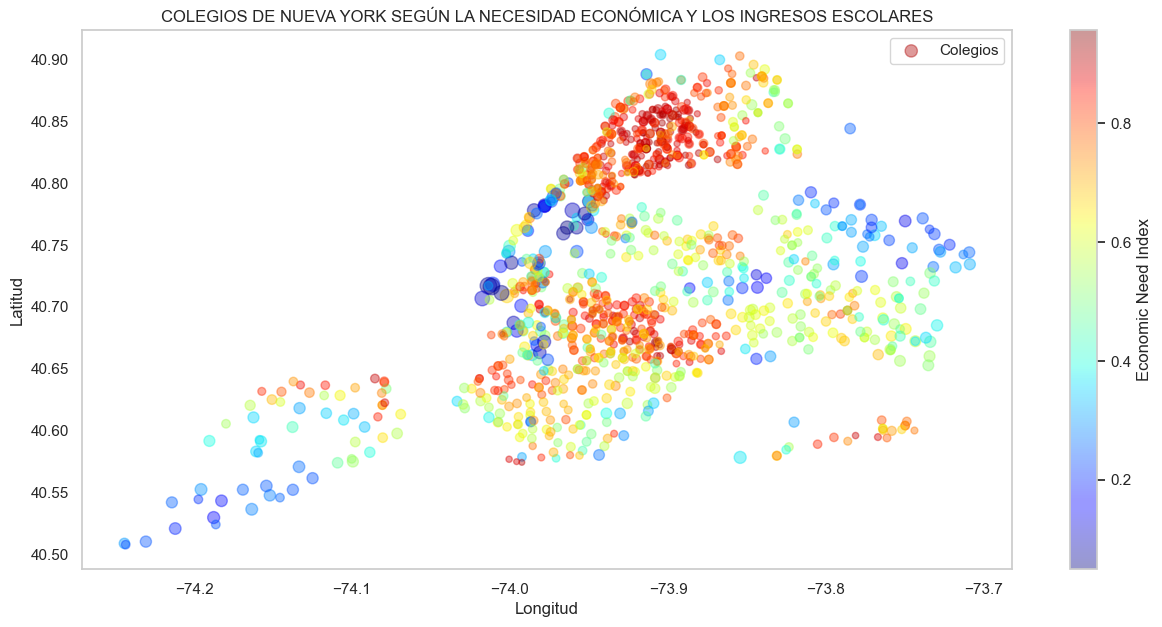

In [364]:
# Gráfica de los colegios según la necesidad económica.

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_schools_ini['School Income Estimate']/1272, # Tamaño de los puntos en base al valor del campo
                    c="Economic Need Index", # Color de los puntos en base al valor del campo
                    cmap=plt.get_cmap("jet"), 
                    label='Colegios', 
                    #title='Mapa de población escolar de Nueva York según la necesidad económica', 
                    title='COLEGIOS DE NUEVA YORK SEGÚN LA NECESIDAD ECONÓMICA Y LOS INGRESOS ESCOLARES',
                    colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7), 
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

plt.legend()
plt.show()

# Los colegios con mayores necesidades económicas se encuentran en las regiones del Centro y Norte de Nueva York según la estimación de ingresos escolares.

Observaciones:

3. ¿Cómo se reparten geográficamente los colegios en función de la raza de sus estudiantes? Utiliza gráficas.
    * ¿En qué zonas de NY se encuentran la mayor parte de colegios con estudiantes de raza negra?
    * Lo mismo para raza hispana
    * Raza blanca
    * Asiática

In [ ]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
#  'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
#  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy',
#  'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
#  'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
#  'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
#  'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat',
#  'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
#  'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',
#  'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
#  'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
#  'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
#  'winter', 'winter_r'

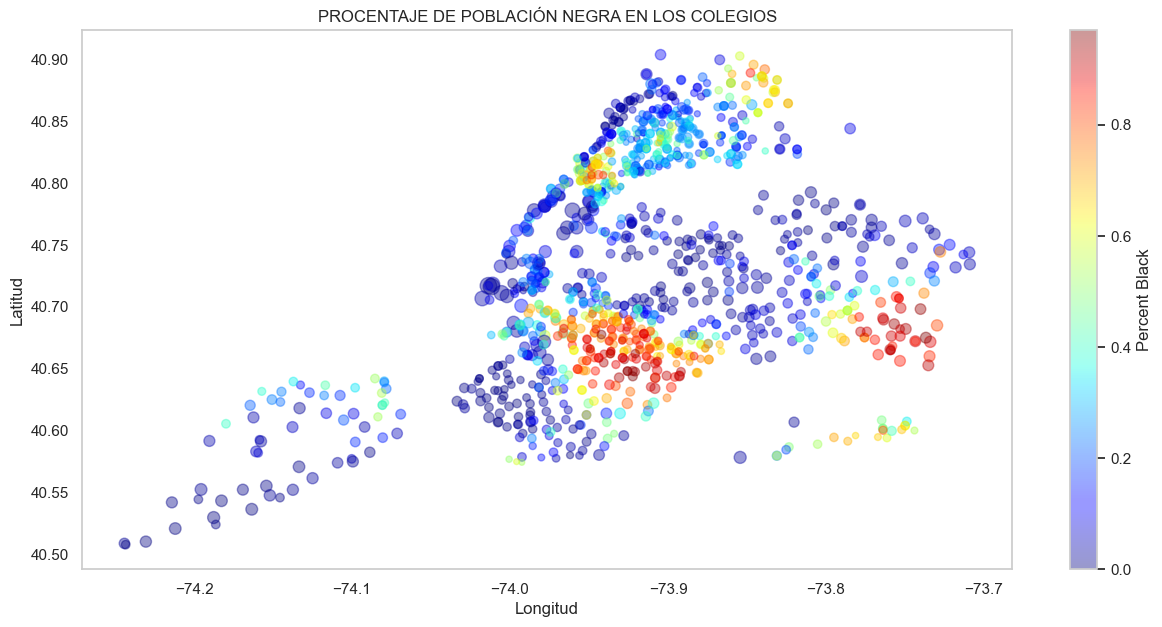

In [360]:
# Mapa de los colegios con mayor población Negra.

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_schools_ini['School Income Estimate']/1272, 
                    c="Percent Black", 
                    cmap=plt.get_cmap("jet"), 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN NEGRA EN LOS COLEGIOS',
                    colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )
#plt.legend()
plt.show()

# El Centro de Nueva York contiene la mayoría de población Negra en colegios. Le sigue la zona Este y Norte.

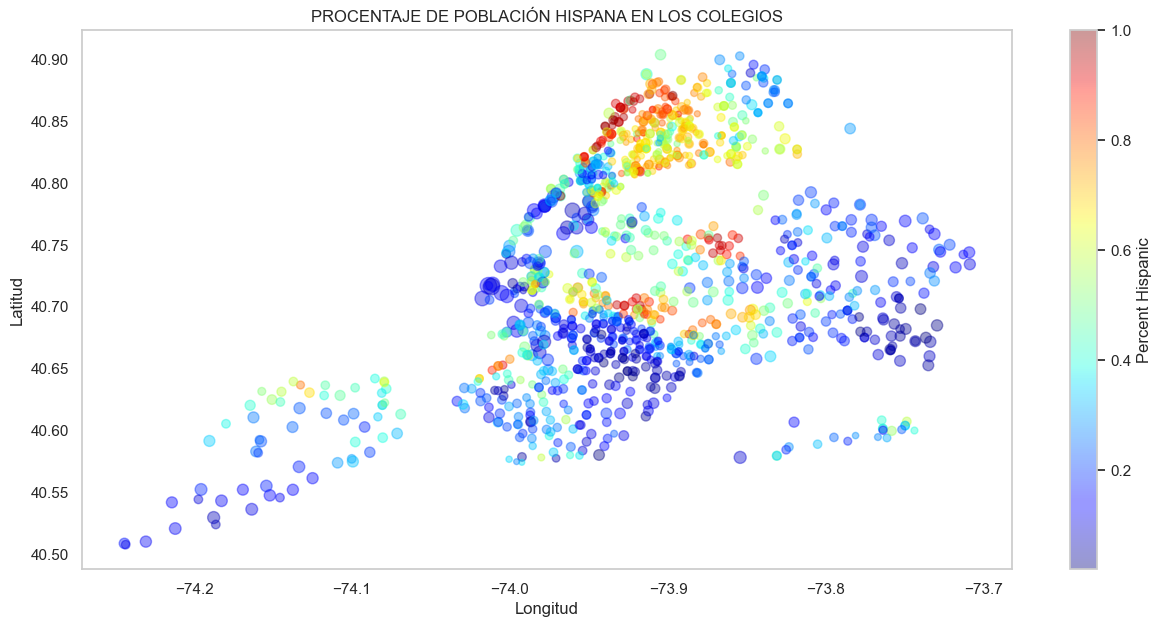

In [361]:
# Mapa de los colegios con mayor población Hispana.

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_schools_ini['School Income Estimate']/1272, 
                    c="Percent Hispanic", 
                    cmap=plt.get_cmap("jet"), 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN HISPANA EN LOS COLEGIOS',
                    colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )
#plt.legend()
plt.show()

# El Norte de Nueva York contiene la mayoría de los colegios con población Hispana. Le sigue la zona Centro.
# Aquí notamos que hay unos pocos Hispanos en el Centro de Nueva York, a diferencia de la polabción Negra que su mayoría está en el Centro.

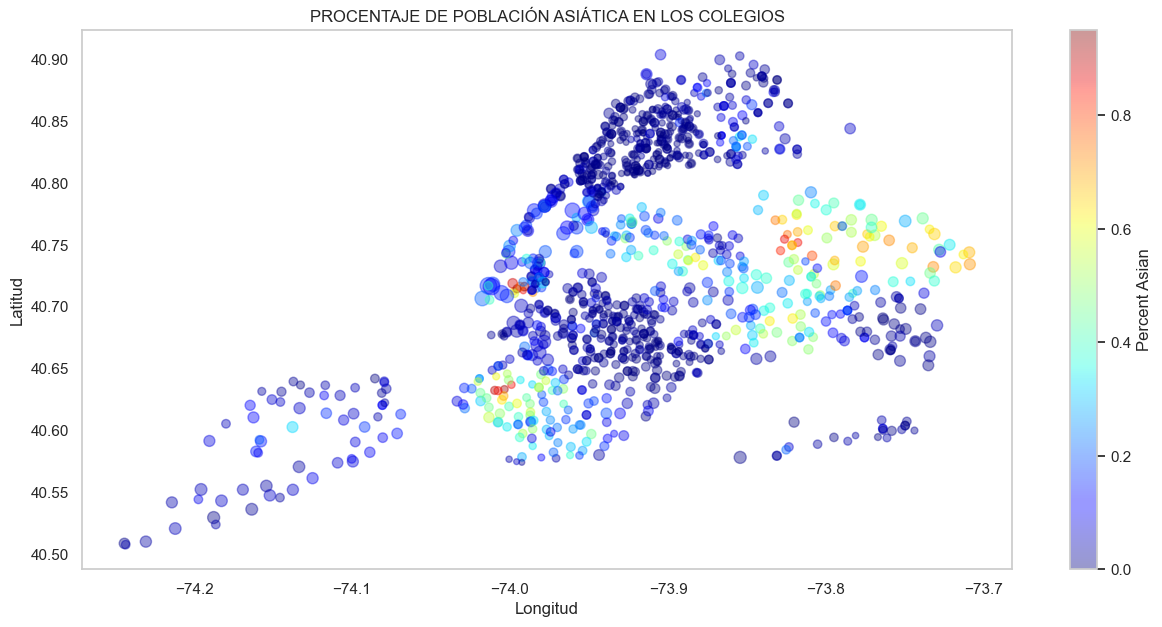

In [362]:
# Mapa de los colegios con mayor población Asiática.

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_schools_ini['School Income Estimate']/1272, 
                    c="Percent Asian", 
                    cmap=plt.get_cmap("jet"), 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN ASIÁTICA EN LOS COLEGIOS', 
                    colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )
#plt.legend()
plt.show()

# La población Asiática tiene mayor índice en el Centro y en el Este de Nueva York.

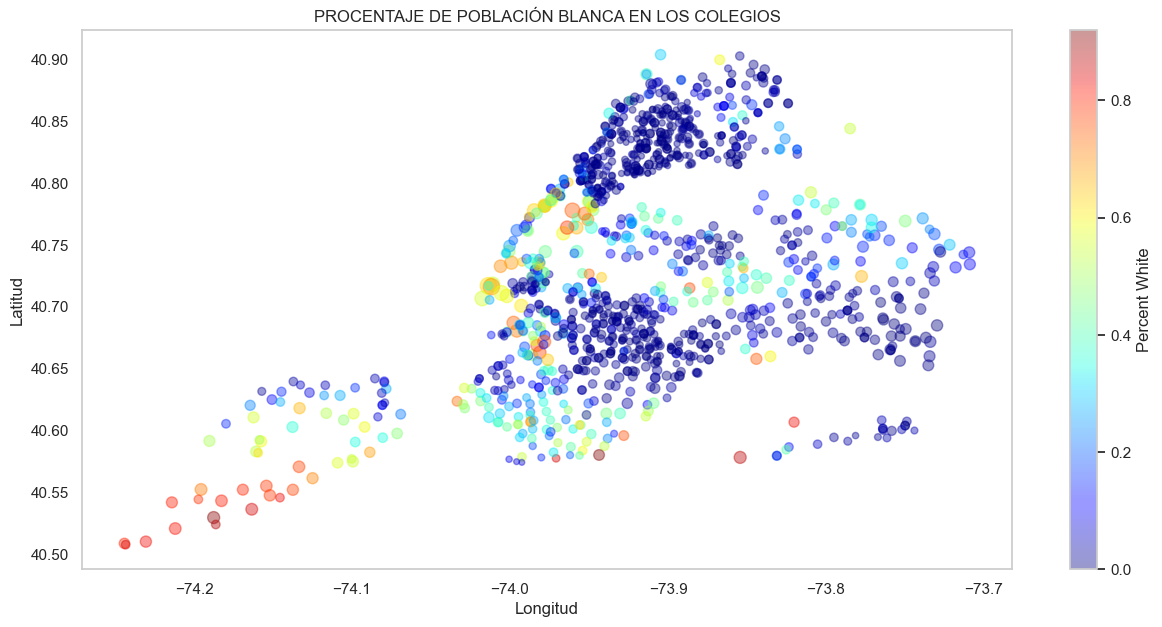

In [359]:
# Mapa de los colegios con mayor población Blanca

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_schools_ini['School Income Estimate']/1272, 
                    c="Percent White", 
                    cmap=plt.get_cmap("jet"), 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN BLANCA EN LOS COLEGIOS', 
                    colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )
#plt.legend()
plt.show()

# La población Blanca tiene un grupo muy notable en la zona Sur en general, habiendo un mayor índice en el Sur-Oeste, borde izquierdo de Nueva York.

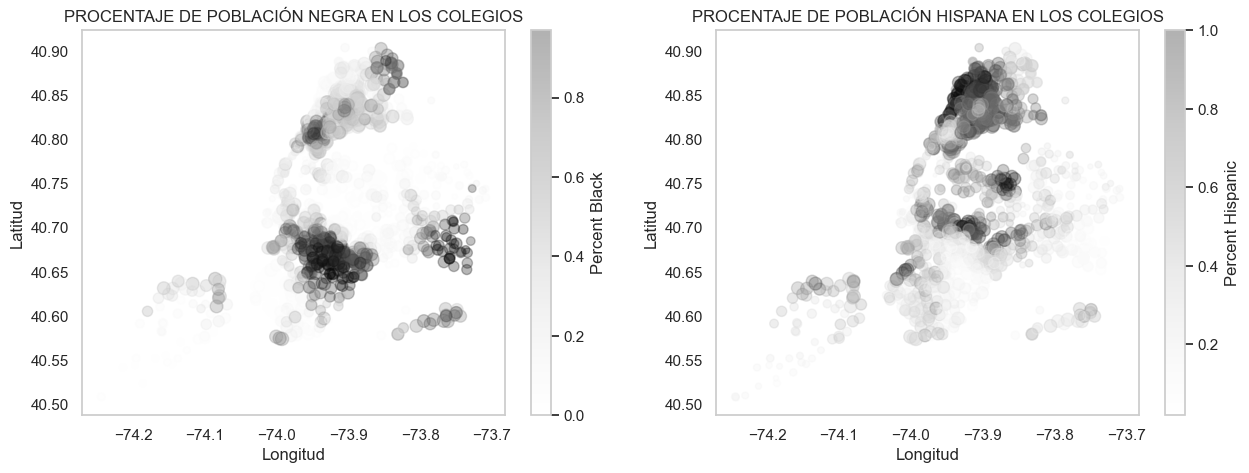

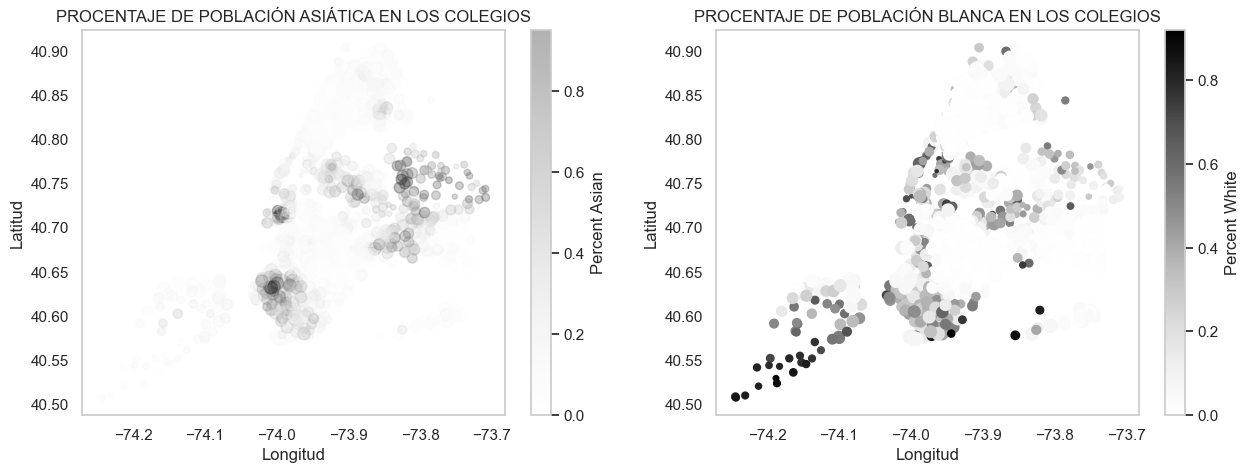

In [365]:
# Mismo ejercicio con otros colores. Se ven más claros los índices de población de las distintas razas.

fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    ax=ax[0],
                    s=df_schools_ini['Economic Need Index'] * 100, 
                    c="Percent Black", 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN NEGRA EN LOS COLEGIOS',
                    colorbar=True, 
                    #colormap="seismic",
                    alpha=0.3, 
                    figsize=(15,5),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    ax=ax[1],
                    s=df_schools_ini['Economic Need Index'] * 100, 
                    c="Percent Hispanic", 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN HISPANA EN LOS COLEGIOS',
                    colorbar=True, 
                    #colormap="seismic",
                    alpha=0.3, 
                    figsize=(15,5),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )


f, ax = plt.subplots(ncols=2, figsize=(15, 6))

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    ax=ax[0],
                    s=df_schools_ini['Economic Need Index'] * 100, 
                    c="Percent Asian", 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN ASIÁTICA EN LOS COLEGIOS',
                    colorbar=True, 
                    #colormap="seismic",
                    alpha=0.3, 
                    figsize=(15,5),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

df_schools_ini.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    ax=ax[1],
                    s=df_schools_ini['Economic Need Index'] * 100, 
                    c="Percent White", 
                    #label='Colegios', 
                    title='PROCENTAJE DE POBLACIÓN BLANCA EN LOS COLEGIOS',
                    colorbar=True, 
                    #colormap="seismic",
                    alpha=1, 
                    figsize=(15,5),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

#plt.legend()
plt.show();

# El Centro de Nueva York contiene la mayoría de población Negra en colegios. Le sigue la zona Este y Norte.

# El Norte de Nueva York contiene la mayoría de los colegios con población Hispana. En la zona Este también tienen bastantes.
# Aquí notamos que hay unos pocos Hispanos en el Centro de Nueva York, a diferencia de la polabción Negra que su mayoría está en el Centro.

# La población Asiática tiene mayor índice en el Centro de Nueva York. Le sigue el Este.

# La población Blanca tiene un grupo muy notable en la zona Sur en general, habiendo un mayor índice en el Sur-Oeste cerca del borde izquierdo de Nueva York.

Observaciones:

4. Analiza las distribuciones de los % de cada raza. ¿Qué raza o razas dirías que predomina en los colegios de NY? Utiliza gráficas

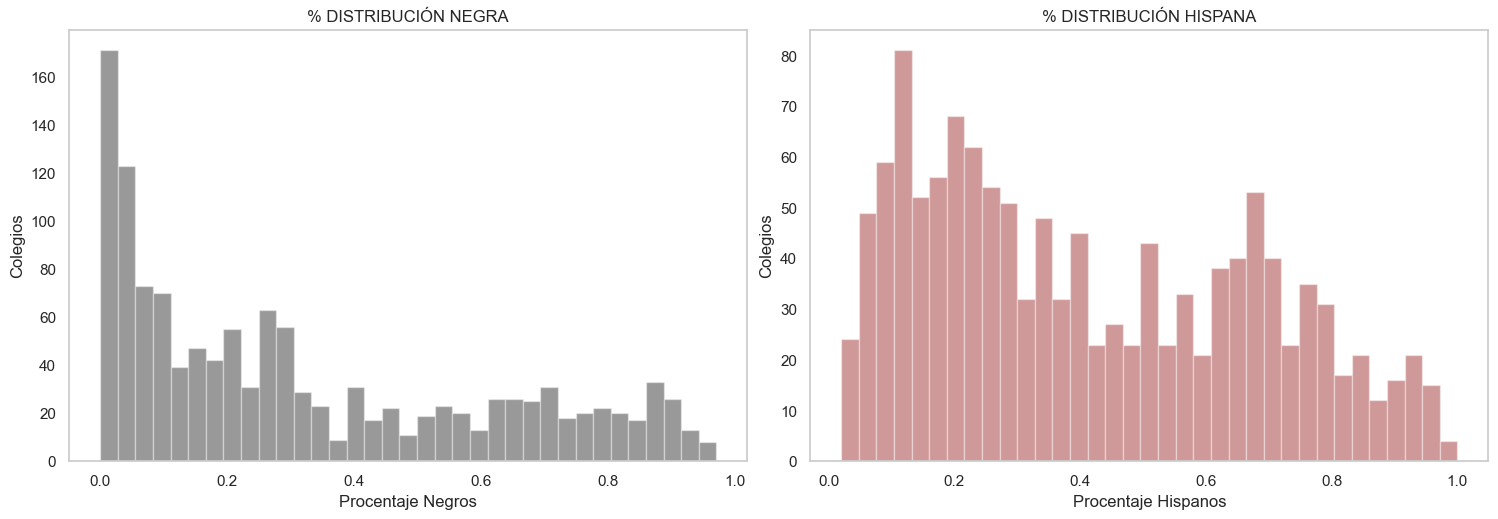

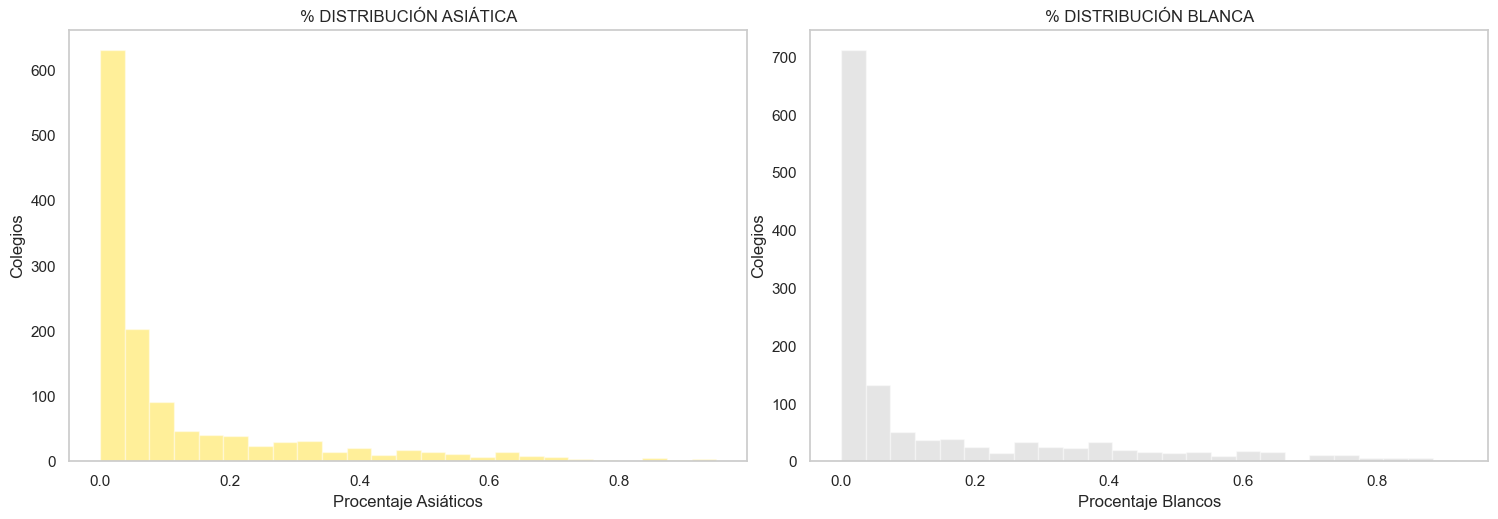

In [375]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.tight_layout()

sns.distplot(df_schools_ini['Percent Black'], 
            kde=False, 
            color="black", 
            ax=ax[0], 
            bins=35
            )
ax[0].set_title('% DISTRIBUCIÓN NEGRA')
ax[0].set_ylabel('Colegios')
ax[0].set_xlabel('Procentaje Negros')
ax[0].grid(False)

sns.distplot(df_schools_ini['Percent Hispanic'], 
            kde=False, 
            color="darkRed", 
            ax=ax[1], 
            bins=35
            )
ax[1].set_title('% DISTRIBUCIÓN HISPANA')
ax[1].set_ylabel('Colegios')
ax[1].set_xlabel('Procentaje Hispanos')
ax[1].grid(False)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.tight_layout()

sns.distplot(df_schools_ini['Percent Asian'], 
            kde=False, 
            color="gold", 
            ax=ax[0], 
            bins=25
            )
ax[0].set_title('% DISTRIBUCIÓN ASIÁTICA')
ax[0].set_ylabel('Colegios')
ax[0].set_xlabel('Procentaje Asiáticos')
ax[0].grid(False)

sns.distplot(df_schools_ini['Percent White'], 
            kde=False, 
            color="silver", 
            ax=ax[1], 
            bins=25
            )
ax[1].set_title('% DISTRIBUCIÓN BLANCA')
ax[1].set_ylabel('Colegios')
ax[1].set_xlabel('Procentaje Blancos')
ax[1].grid(False);


# Podemos ver que la población de mayor a menor es la siguiente: 
    # 1ª Hispana 2ª Negra 3ª Asiática 4ª Blanca

# También podemos ver que la mayoría de los Blancos y Asiáticos representan aproximadamente el 10% de la población de los colegios.

# Aparentemente se aprecia que los Asiáticos y Blancos predominan en ciertos colegios, pero en general los Negros e Hispanos tienen mayor porcentaje.

Observaciones:

5. ¿Hay alguna relación entre las necesidades económicas de los colegios y la raza de sus estudiantes? ¿Y entre los ingresos y sus razas? Utiliza un mapa de calor con las correlaciones

In [ ]:
# Economic Need Index                       # Índice de Necesidad Económica
# School Income Estimate                    # Estimación de ingresos escolares

# Percent ELL (English Language Learner)    # Porcentaje ELL (estudiantes que están aprendiendo inglés)
# Percent Asian                             # Porcentaje asiático
# Percent Black                             # Porcentaje Negro
# Percent Hispanic                          # Porcentaje Hispano
# Percent Black / Hispanic                  # Porcentaje Negro / Hispano
# Percent White                             # Porcentaje Blanco

# Mapa de calor de correlaciones

# Valor 1: correlación lineal positiva ideal
# Valor 0: Sin correlación lineal
# Valor -1: Correlación lineal negativa ideal

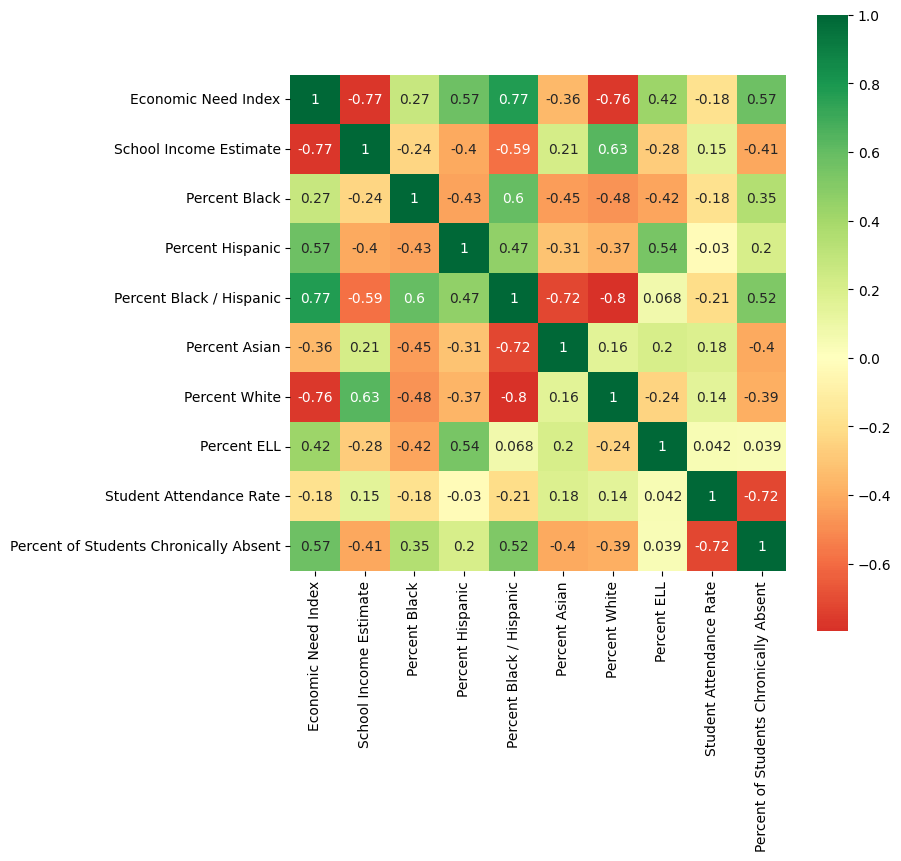

In [18]:
df_schools_eco_income = df_schools_ini[['Economic Need Index', 'School Income Estimate', 
                                'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent Asian', 'Percent White', 'Percent ELL', 
                                'Student Attendance Rate', 'Percent of Students Chronically Absent']]

plt.figure(figsize=(8, 8))
sns.heatmap(df_schools_eco_income.corr(), cmap="RdYlGn", center=0, annot=True, square=True);

# Los colegios con una población Blanca y Asiática tienen un índice de necesidad económica más bajo y por el contrario tienen una mayor estimación de ingresos escolares. 
# Los colegios con una población Hispana y Negra tienen un índice de necesidad económica más alto y por el contrario tienen una menor estimación de ingresos escolares.
# Los estudiantes Blancos tienen mejor apoyo de las escuelas que cualquier otra persona, pero pagando más. Le siguen los Asiáticos.

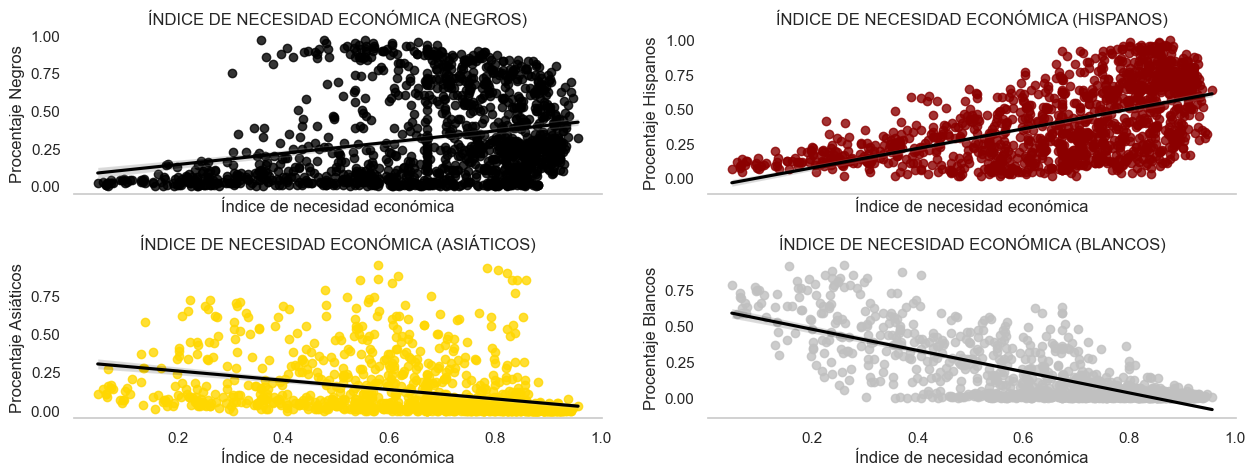

In [434]:
# ÍNDICE DE NECESIDAD ECONÓMICA vs Razas

fig, ax = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.regplot(x=df_schools_eco_income["Economic Need Index"], y=df_schools_eco_income["Percent Black"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["Economic Need Index"], y=df_schools_eco_income["Percent Hispanic"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["Economic Need Index"], y=df_schools_eco_income["Percent Asian"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["Economic Need Index"], y=df_schools_eco_income["Percent White"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})

ax[0, 0].set_title('ÍNDICE DE NECESIDAD ECONÓMICA (NEGROS)')
ax[0, 1].set_title('ÍNDICE DE NECESIDAD ECONÓMICA (HISPANOS)')
ax[1, 0].set_title('ÍNDICE DE NECESIDAD ECONÓMICA (ASIÁTICOS)')
ax[1, 1].set_title('ÍNDICE DE NECESIDAD ECONÓMICA (BLANCOS)')
ax[1, 1].set_title('ÍNDICE DE NECESIDAD ECONÓMICA (BLANCOS)')


ax[0, 0].set_xlabel('Índice de necesidad económica')
ax[0, 0].set_ylabel('Procentaje Negros')

ax[0, 1].set_xlabel('Índice de necesidad económica')
ax[0, 1].set_ylabel('Procentaje Hispanos')

ax[1, 0].set_xlabel('Índice de necesidad económica')
ax[1, 0].set_ylabel('Procentaje Asiáticos')

ax[1, 1].set_xlabel('Índice de necesidad económica')
ax[1, 1].set_ylabel('Procentaje Blancos')


ax[0, 0].grid(False)
ax[0, 1].grid(False)
ax[1, 0].grid(False)
ax[1, 1].grid(False)

plt.subplots_adjust(hspace=0.4)

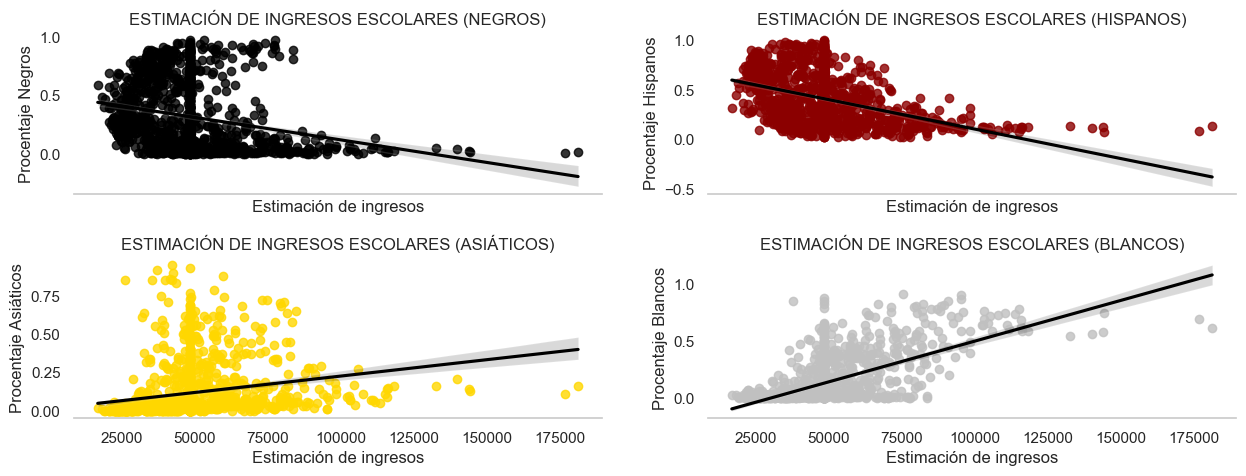

In [435]:
# ESTIMACIÓN DE INGRESOS ESCOLARES vs Razas

fig, ax = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.regplot(x=df_schools_eco_income["School Income Estimate"], y=df_schools_eco_income["Percent Black"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["School Income Estimate"], y=df_schools_eco_income["Percent Hispanic"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["School Income Estimate"], y=df_schools_eco_income["Percent Asian"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_eco_income["School Income Estimate"], y=df_schools_eco_income["Percent White"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})

ax[0, 0].set_title('ESTIMACIÓN DE INGRESOS ESCOLARES (NEGROS)')
ax[0, 1].set_title('ESTIMACIÓN DE INGRESOS ESCOLARES (HISPANOS)')
ax[1, 0].set_title('ESTIMACIÓN DE INGRESOS ESCOLARES (ASIÁTICOS)')
ax[1, 1].set_title('ESTIMACIÓN DE INGRESOS ESCOLARES (BLANCOS)')

ax[0, 0].set_xlabel('Estimación de ingresos')
ax[0, 0].set_ylabel('Procentaje Negros')

ax[0, 1].set_xlabel('Estimación de ingresos')
ax[0, 1].set_ylabel('Procentaje Hispanos')

ax[1, 0].set_xlabel('Estimación de ingresos')
ax[1, 0].set_ylabel('Procentaje Asiáticos')

ax[1, 1].set_xlabel('Estimación de ingresos')
ax[1, 1].set_ylabel('Procentaje Blancos')

ax[0, 0].grid(False)
ax[0, 1].grid(False)
ax[1, 0].grid(False)
ax[1, 1].grid(False)

plt.subplots_adjust(hspace=0.4)

Observaciones:

6. Analicemos ahora la asistencia a clase. Supongamos que hay colegios con alta tasa de ausencia (>=30%) y baja tasa de asistencia (<=11%). Utiliza gráficas.
    * ¿Dónde se situan los de alta y baja tasa?
    * ¿Qué % mayoritario de razas tienen ambos grupos?
    * Necesidades económicas y estimación de ingresos de esos colegios.

In [21]:
df_schools_abs_low_att_hig = df_schools_ini[(df_schools_ini['Percent of Students Chronically Absent'] >= 0.3) & (df_schools_ini['Student Attendance Rate'] <= 0.11)]
len(df_schools_abs_low_att_hig)

10

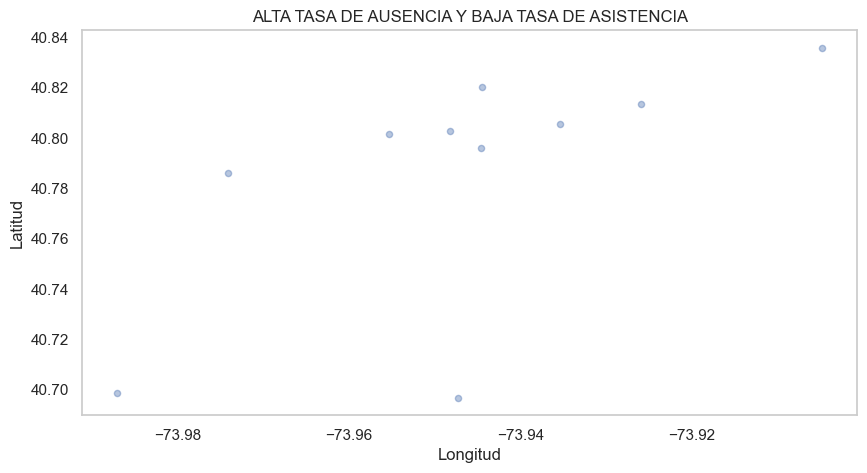

In [388]:
df_schools_abs_low_att_hig.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    cmap=plt.get_cmap("jet"), 
                    title='ALTA TASA DE AUSENCIA Y BAJA TASA DE ASISTENCIA', 
                    #colorbar=True, 
                    alpha=0.4, 
                    figsize=(10,5),
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

plt.show();

# Claramente se ve que los colegios con una alta tasa de ausencia y una baja tasa de asistencia se encuentan ubicados en la zona Norte.

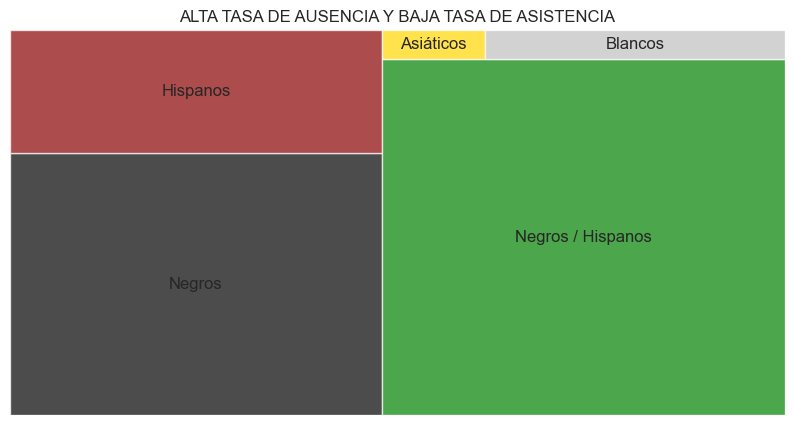

In [405]:
df_schools_razas = df_schools_abs_low_att_hig[['Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent Asian', 'Percent White']].mean()

plt.figure(figsize=(10,5))
squarify.plot(sizes=df_schools_razas.values, 
            #label=df_schools_razas.index, 
            color=['black', 'darkRed', 'green', 'gold', 'silver'], 
            label=['Negros', 'Hispanos', 'Negros / Hispanos', 'Asiáticos', 'Blancos'],
            alpha=.7)
plt.axis('off')
plt.title("ALTA TASA DE AUSENCIA Y BAJA TASA DE ASISTENCIA")
plt.show()

# Los Negros y los Hispanos tienen el mayor índice (alta tasa de ausencia y baja tasa de asistencia).
# Justamente coincide con el gráfico anterior ya que los Hispanos tienen un mayor índice de población escolar en la zona Norte.

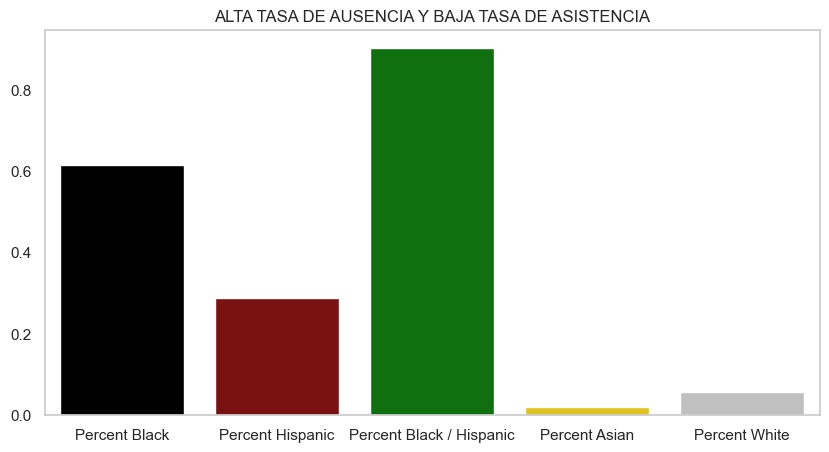

In [407]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_schools_razas.index,
            y=df_schools_razas.values,
            palette=['black', 'darkRed', 'green', 'silver']
            )

ax.set_title('ALTA TASA DE AUSENCIA Y BAJA TASA DE ASISTENCIA')
ax.grid(False)

# Los Negros y los Hispanos tienen el mayor índice (alta tasa de ausencia y baja tasa de asistencia).
# Justamente coincide con el gráfico anterior ya que los Hispanos tienen un mayor índice de población escolar en la zona Norte.

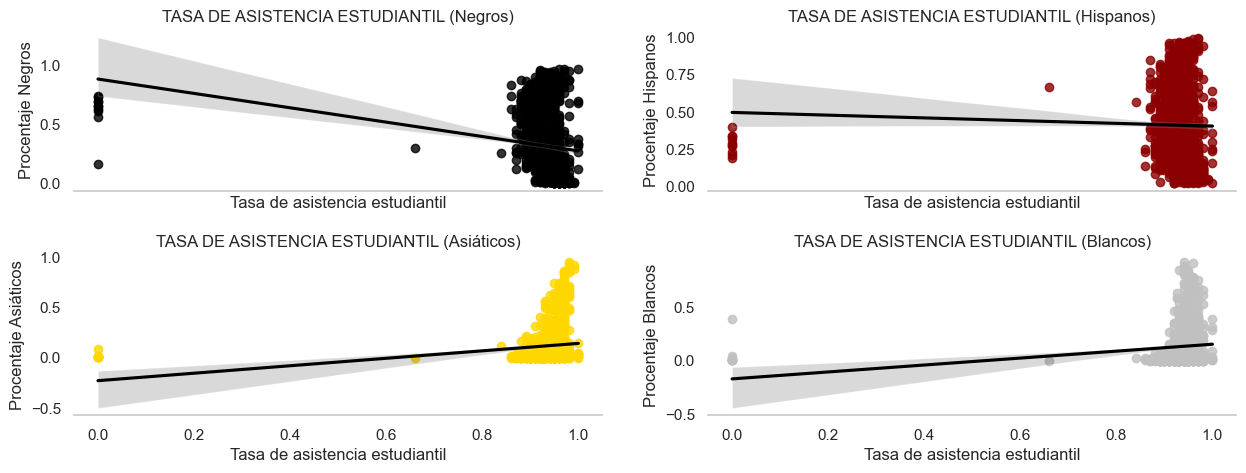

In [436]:
# Tasa de asistencia por razas en general (sin el filtro del enunciado).

fig, ax = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.regplot(x=df_schools_ini["Student Attendance Rate"], y=df_schools_ini["Percent Black"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Student Attendance Rate"], y=df_schools_ini["Percent Hispanic"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Student Attendance Rate"], y=df_schools_ini["Percent Asian"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Student Attendance Rate"], y=df_schools_ini["Percent White"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})

ax[0, 0].set_title('TASA DE ASISTENCIA ESTUDIANTIL (Negros)')
ax[0, 1].set_title('TASA DE ASISTENCIA ESTUDIANTIL (Hispanos)')
ax[1, 0].set_title('TASA DE ASISTENCIA ESTUDIANTIL (Asiáticos)')
ax[1, 1].set_title('TASA DE ASISTENCIA ESTUDIANTIL (Blancos)')

ax[0, 0].set_xlabel('Tasa de asistencia estudiantil')
ax[0, 0].set_ylabel('Procentaje Negros')

ax[0, 1].set_xlabel('Tasa de asistencia estudiantil')
ax[0, 1].set_ylabel('Procentaje Hispanos')

ax[1, 0].set_xlabel('Tasa de asistencia estudiantil')
ax[1, 0].set_ylabel('Procentaje Asiáticos')

ax[1, 1].set_xlabel('Tasa de asistencia estudiantil')
ax[1, 1].set_ylabel('Procentaje Blancos')

ax[0, 0].grid(False)
ax[0, 1].grid(False)
ax[1, 0].grid(False)
ax[1, 1].grid(False)

plt.subplots_adjust(hspace=0.4)

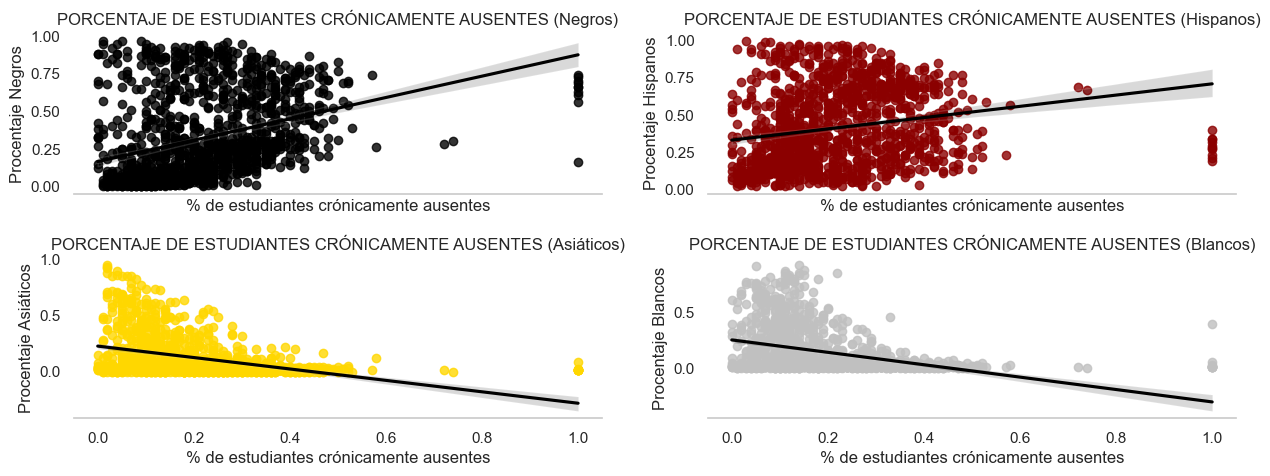

In [438]:
# Porcentaje de ausencia por razas en general (sin el filtro del enunciado).

fig, ax = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.regplot(x=df_schools_ini["Percent of Students Chronically Absent"], y=df_schools_ini["Percent Black"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Percent of Students Chronically Absent"], y=df_schools_ini["Percent Hispanic"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Percent of Students Chronically Absent"], y=df_schools_ini["Percent Asian"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
sns.regplot(x=df_schools_ini["Percent of Students Chronically Absent"], y=df_schools_ini["Percent White"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})

ax[0, 0].set_title('PORCENTAJE DE ESTUDIANTES CRÓNICAMENTE AUSENTES (Negros)')
ax[0, 1].set_title('PORCENTAJE DE ESTUDIANTES CRÓNICAMENTE AUSENTES (Hispanos)')
ax[1, 0].set_title('PORCENTAJE DE ESTUDIANTES CRÓNICAMENTE AUSENTES (Asiáticos)')
ax[1, 1].set_title('PORCENTAJE DE ESTUDIANTES CRÓNICAMENTE AUSENTES (Blancos)')

ax[0, 0].set_xlabel('% de estudiantes crónicamente ausentes')
ax[0, 0].set_ylabel('Procentaje Negros')

ax[0, 1].set_xlabel('% de estudiantes crónicamente ausentes')
ax[0, 1].set_ylabel('Procentaje Hispanos')

ax[1, 0].set_xlabel('% de estudiantes crónicamente ausentes')
ax[1, 0].set_ylabel('Procentaje Asiáticos')

ax[1, 1].set_xlabel('% de estudiantes crónicamente ausentes')
ax[1, 1].set_ylabel('Procentaje Blancos')

ax[0, 0].grid(False)
ax[0, 1].grid(False)
ax[1, 0].grid(False)
ax[1, 1].grid(False)

plt.subplots_adjust(hspace=0.4)

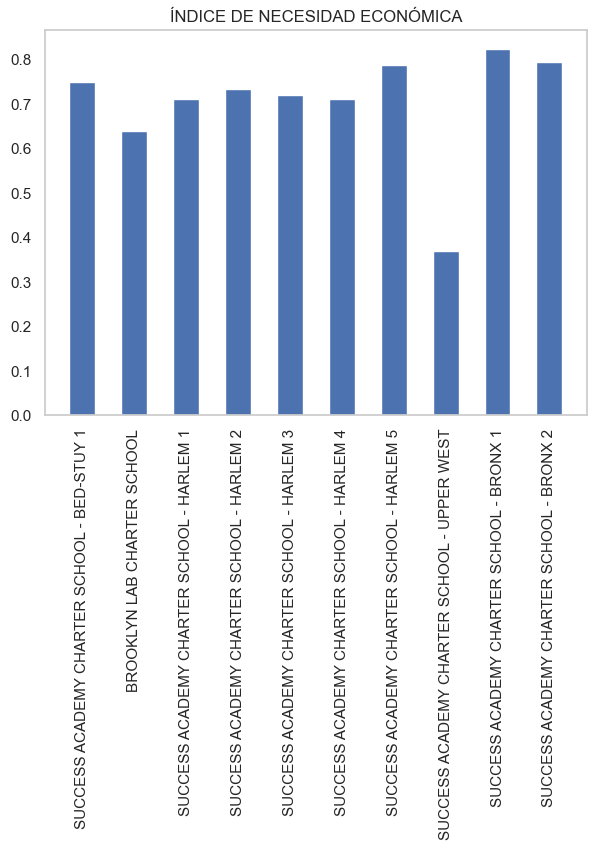

In [444]:
fig = plt.figure(figsize=(7,5))

plt.title("ÍNDICE DE NECESIDAD ECONÓMICA")
plt.bar(df_schools_abs_low_att_hig['School Name'], df_schools_abs_low_att_hig['Economic Need Index'], width=0.5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

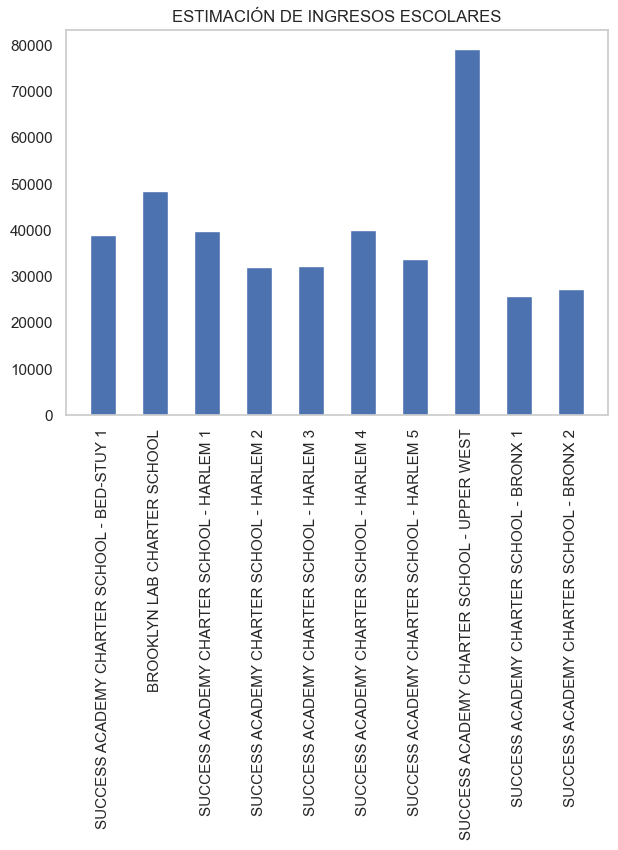

In [445]:
fig = plt.figure(figsize=(7,5))

plt.title("ESTIMACIÓN DE INGRESOS ESCOLARES")
plt.bar(df_schools_abs_low_att_hig['School Name'], df_schools_abs_low_att_hig['School Income Estimate'], width=0.5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

Observaciones:

7. Vamos a analizar el rendimiento académico de los alumnos. Para ello, tendremos que dividir el dataset en colegios donde predominan latinos y negros (>= 70%) vs predominio de asiáticos y blancos. Saca algunos estadísticos y compara en una gráfica las funciones de densidad de ambos grupos, para los scores de matemáticas y ELA (English Language Arts). Utiliza gráficas.

In [479]:
# Creamos un campo nuevo que suma los porcentajes de Asiáticos y Blancos.

df_schools_ini['Percent Asian / White'] = df_schools_ini['Percent Asian'] + df_schools_ini['Percent White']

In [477]:
df_schools_his_bla = df_schools_ini[df_schools_ini['Percent Black / Hispanic'] >= 0.7]

In [480]:
df_schools_asi_whi = df_schools_ini[df_schools_ini['Percent Asian / White'] >= 0.7]

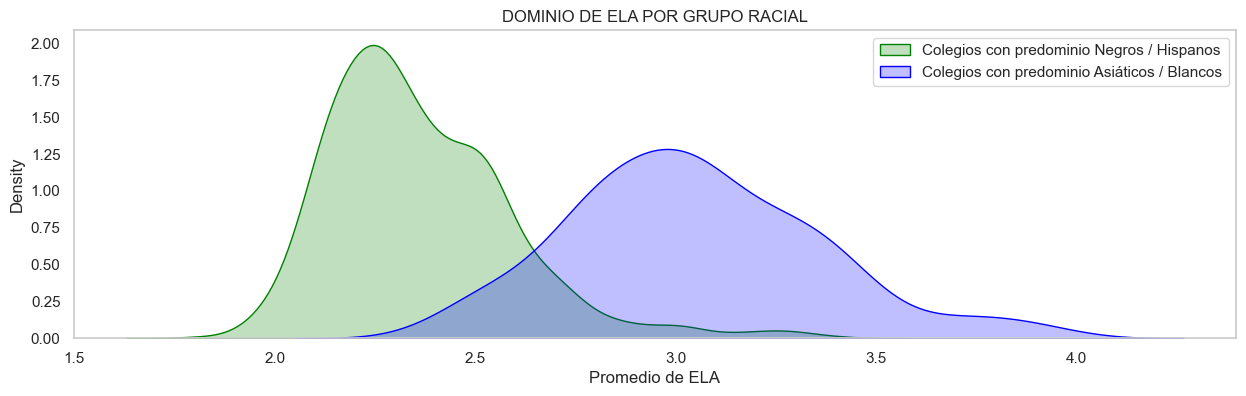

In [460]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_his_bla['Average ELA Proficiency'] , color='green', shade=True, label='Colegios con predominio Negros / Hispanos')
sns.kdeplot(df_schools_asi_whi['Average ELA Proficiency'] , color='blue', shade=True, label='Colegios con predominio Asiáticos / Blancos')

plt.legend()
plt.title('DOMINIO DE ELA POR GRUPO RACIAL')
plt.grid(False)
plt.xlabel('Promedio de ELA');

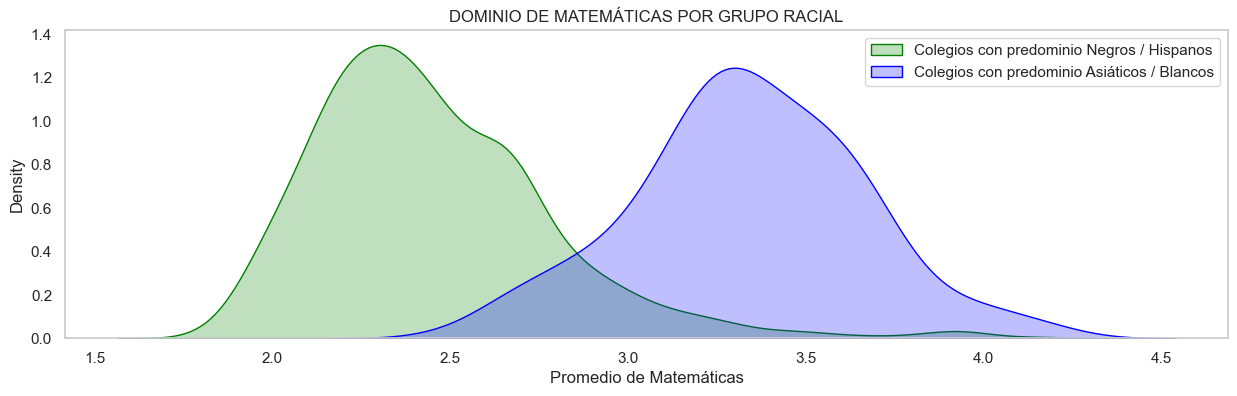

In [459]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_his_bla['Average Math Proficiency'] , color='green', shade=True, label='Colegios con predominio Negros / Hispanos')
sns.kdeplot(df_schools_asi_whi['Average Math Proficiency'] , color='blue', shade=True, label='Colegios con predominio Asiáticos / Blancos')

plt.legend()
plt.title('DOMINIO DE MATEMÁTICAS POR GRUPO RACIAL')
plt.grid(False)
plt.xlabel('Promedio de Matemáticas');

In [475]:
# Los colegios predominantementes de Negros e Hispanos tienen una media en ELA de 2.36 y una media en matemáticas de 2.45

df_schools_his_bla[df_schools_his_bla['Percent Black / Hispanic'] >= .70][['Average ELA Proficiency', 'Average Math Proficiency']].mean().round(2)

Average ELA Proficiency     2.36
Average Math Proficiency    2.45
dtype: float64

In [481]:
# Los colegios predominantementes de Asiáticas y Blancos tienen una media en ELA de 3.05 y una media en matemáticas de 3.34

df_schools_asi_whi[df_schools_asi_whi['Percent Asian / White'] >= .70][['Average ELA Proficiency', 'Average Math Proficiency']].mean().round(2)

Average ELA Proficiency     3.05
Average Math Proficiency    3.34
dtype: float64

Observaciones:

8. Comprobaremos ahora la influencia de que un colegio pertenezca o no a una comunidad
    * ¿En qué afecta que el colegio pertenezca a una comunidad? Raza, necesidades económicas, ingresos...
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores ingresos.
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores necesidades económicas.

In [461]:
# Hay muchos más colegios no-comunitarios que comunitarios.

df_schools_ini.groupby('Community School?')['index'].count()

Community School?
No     1196
Yes      76
Name: index, dtype: int64

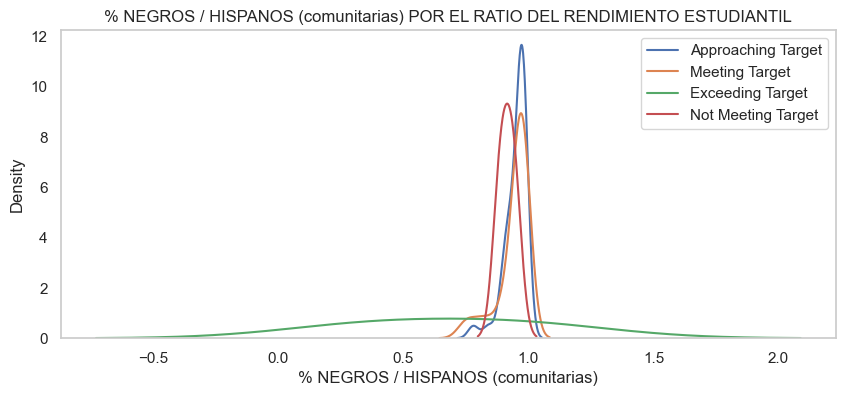

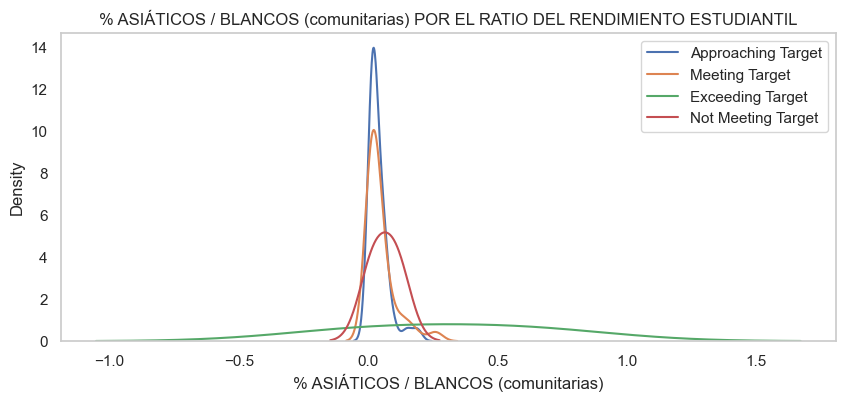

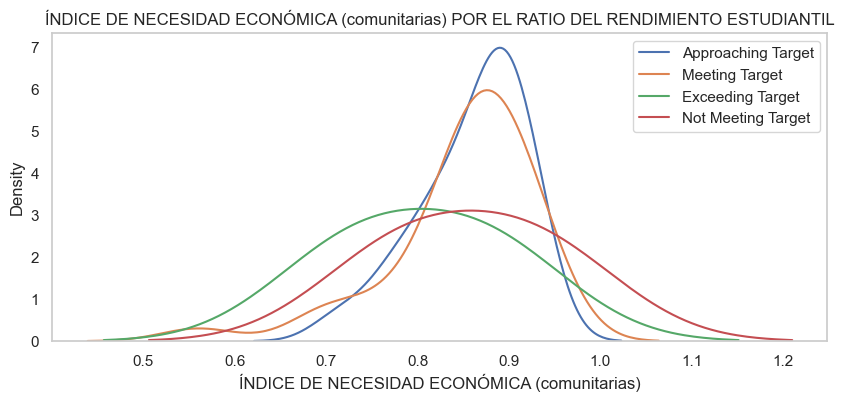

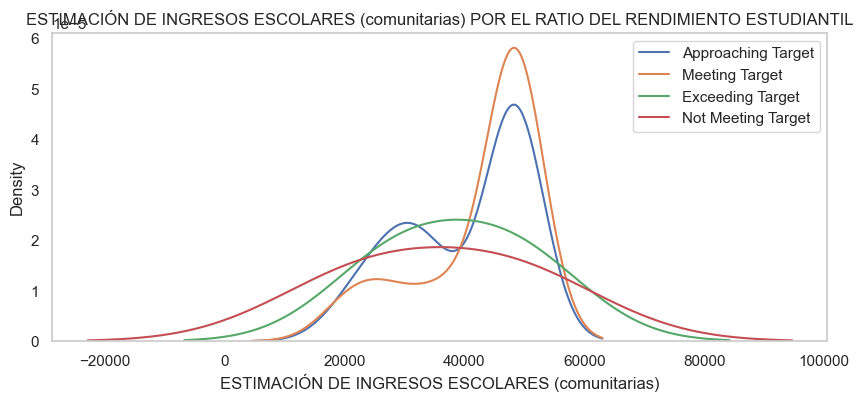

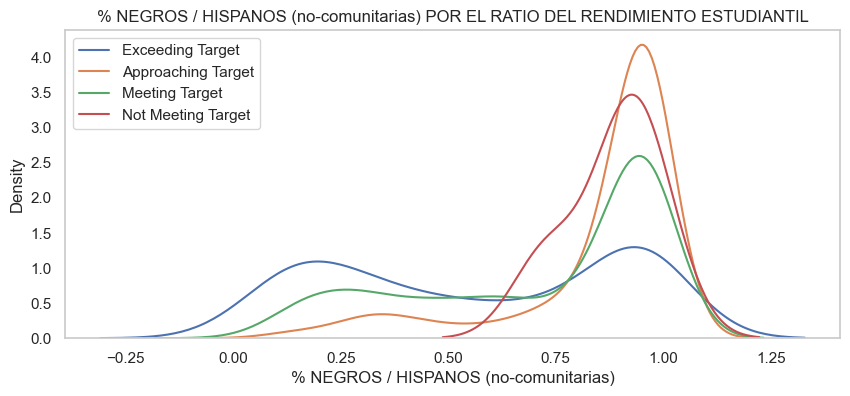

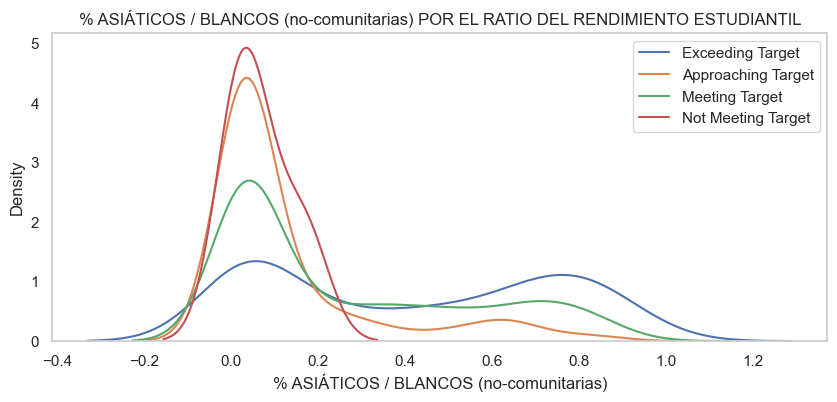

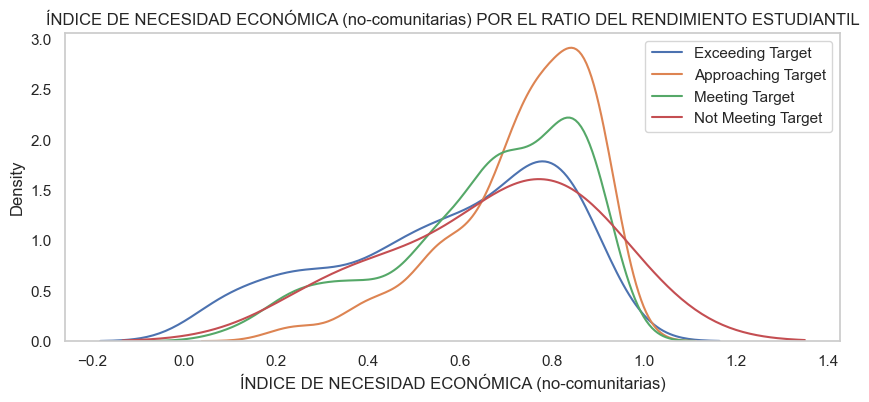

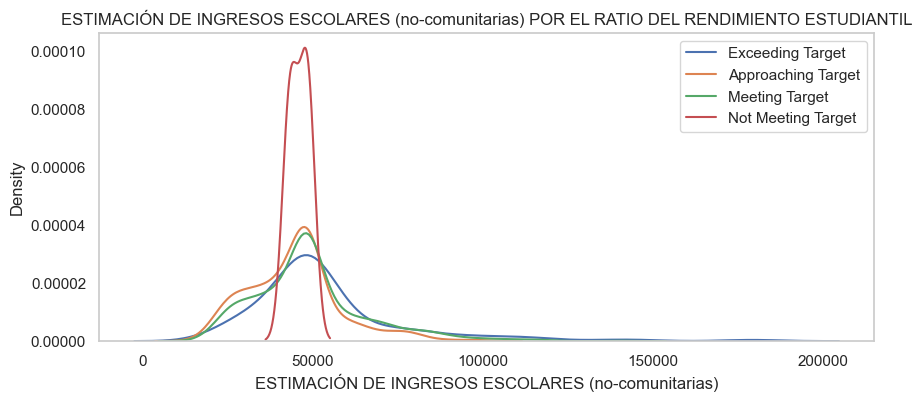

In [511]:
df_schools_ini_comun = df_schools_ini[df_schools_ini['Community School?'] == "Yes"]
df_schools_ini_no_comun = df_schools_ini[df_schools_ini['Community School?'] == "No"]

def genera_grafica(dataset, columna, etiqueta):
    plt.figure(figsize = (10, 4))
    dataset = dataset[dataset['Student Achievement Rating'].notnull()]
    for item in dataset['Student Achievement Rating'].unique():
        subset = dataset[dataset['Student Achievement Rating'] == item].copy()
        sns.kdeplot(
                    subset[columna].dropna(), 
                    label = item, 
                    palette=('blue', 'yelow', 'green', 'red')
                    )

    plt.xlabel(etiqueta); 
    plt.legend()
    plt.grid(False)
    plt.title(etiqueta + ' POR EL RATIO DEL RENDIMIENTO ESTUDIANTIL')

genera_grafica(df_schools_ini_comun, 'Percent Black / Hispanic', '% NEGROS / HISPANOS (comunitarias)')
genera_grafica(df_schools_ini_comun, 'Percent Asian / White', '% ASIÁTICOS / BLANCOS (comunitarias)')
genera_grafica(df_schools_ini_comun, 'Economic Need Index', 'ÍNDICE DE NECESIDAD ECONÓMICA (comunitarias)')
genera_grafica(df_schools_ini_comun, 'School Income Estimate', 'ESTIMACIÓN DE INGRESOS ESCOLARES (comunitarias)')

genera_grafica(df_schools_ini_no_comun, 'Percent Black / Hispanic', '% NEGROS / HISPANOS (no-comunitarias)')
genera_grafica(df_schools_ini_no_comun, 'Percent Asian / White', '% ASIÁTICOS / BLANCOS (no-comunitarias)')
genera_grafica(df_schools_ini_no_comun, 'Economic Need Index', 'ÍNDICE DE NECESIDAD ECONÓMICA (no-comunitarias)')
genera_grafica(df_schools_ini_no_comun, 'School Income Estimate', 'ESTIMACIÓN DE INGRESOS ESCOLARES (no-comunitarias)');

In [ ]:
# Percent Asian
# Percent Black
# Percent Hispanic
# Percent Black / Hispanic
# Percent White

plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_ini['Percent White'][(df_schools_ini['Community School?'] == 'Yes')], color='r', shade=True, label='Colegio Comunitario')
sns.kdeplot(df_schools_ini['Percent White'][(df_schools_ini['Community School?'] == 'No')], color='g', shade=True, label='Colegio No-Comunitario')

plt.legend()
plt.title('Porcentaje de Blancos en colegios Comunitarios y No-Comunitarios')
plt.grid(False)
plt.xlabel('Porcentaje de Blancos');


# Hay mayor porcentaje de Blancos y Asiáticos en colegios comunitarios que de Negros e Hispanos.

In [ ]:
# df_schools_ini['Community School?'][df_schools_ini['Community School?'] == "Yes"]

In [ ]:
# df_schools_comunity = df_schools_ini[['Community School?', 'Strong Family-Community Ties %', 'Economic Need Index', 'School Income Estimate', 
#                                 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent Asian', 'Percent White', 
#                                 'Student Attendance Rate', 'Percent of Students Chronically Absent']]

# plt.figure(figsize=(8, 8))
# sns.heatmap(df_schools_comunity.corr(), cmap="RdYlGn", center=0, annot=True, square=True);


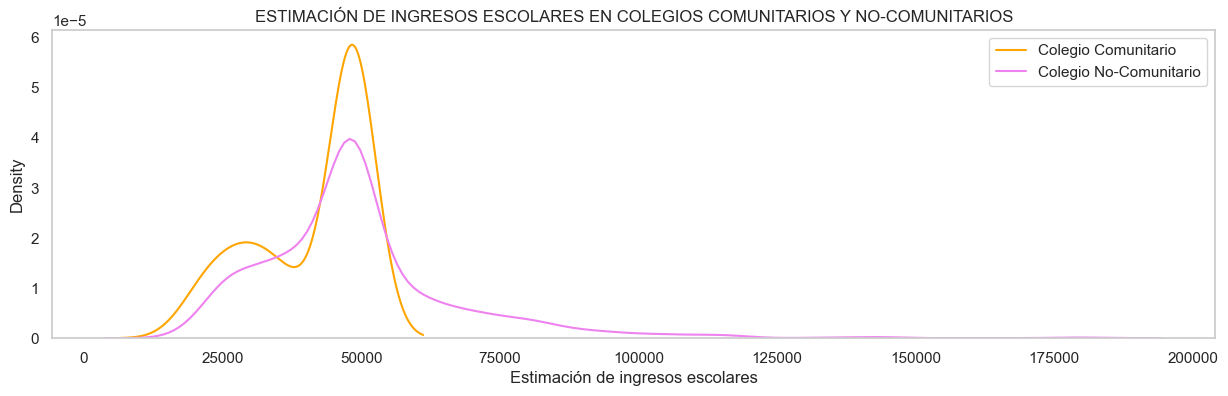

In [472]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_ini['School Income Estimate'][(df_schools_ini['Community School?'] == 'Yes')], color='orange', label='Colegio Comunitario')
sns.kdeplot(df_schools_ini['School Income Estimate'][(df_schools_ini['Community School?'] == 'No')], color='violet', label='Colegio No-Comunitario')

plt.legend()
plt.title('ESTIMACIÓN DE INGRESOS ESCOLARES EN COLEGIOS COMUNITARIOS Y NO-COMUNITARIOS')
plt.grid(False)
plt.xlabel('Estimación de ingresos escolares');

# Los colegios comunitarios tienen una mayor Estimación de Ingresos frente a los no-comunitarios.

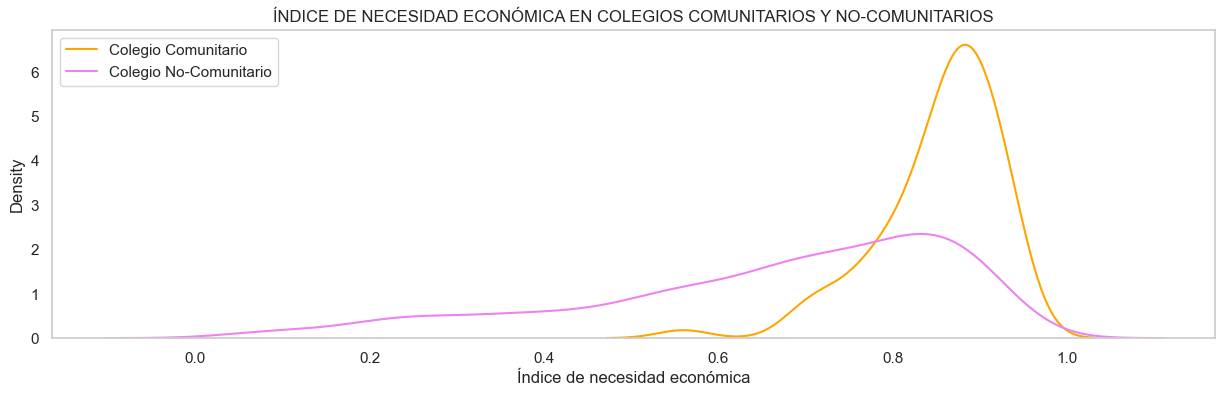

In [473]:
plt.figure(figsize=(15,4))

sns.kdeplot(df_schools_ini['Economic Need Index'][(df_schools_ini['Community School?'] == 'Yes')], color='orange', label='Colegio Comunitario')
sns.kdeplot(df_schools_ini['Economic Need Index'][(df_schools_ini['Community School?'] == 'No')], color='violet', label='Colegio No-Comunitario')

plt.legend()
plt.title('ÍNDICE DE NECESIDAD ECONÓMICA EN COLEGIOS COMUNITARIOS Y NO-COMUNITARIOS')
plt.grid(False)
plt.xlabel('Índice de necesidad económica');

# Los colegios no-comunitarios tienen un mayor Índice de Necesidad Económica frente a los comunitarios.

In [ ]:
# color="black"
# color="darkRed"
# color="gold"
# color="silver"

Observaciones:

9. Escoge a las top 10 ciudades con más colegios. Muestra la dispersión de los ingresos estimados de los colegios de cada ciudad con diagramas de caja.
    * Cual es la ciudad con mayor y menor dispersión?
    * En qué ciudades se encuentran que la mitad de los colegios tienen un mínimo de ingresos de 50000.

In [534]:
# Top 10 ciudades con más colegios
lst_schools_top_10 = list(df_schools_ini.groupby('City')['index'].count().sort_values(ascending=False).head(10).index)

# Creamos un df filtrado por las 10 ciudades. Resultado = 1120 colegios
df_schools_top_10 = df_schools_ini[df_schools_ini['City'].isin(lst_schools_top_10)]

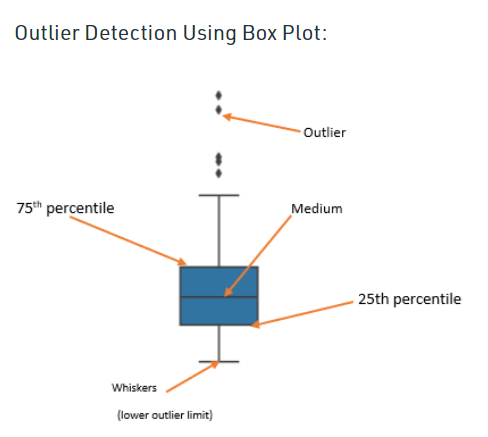

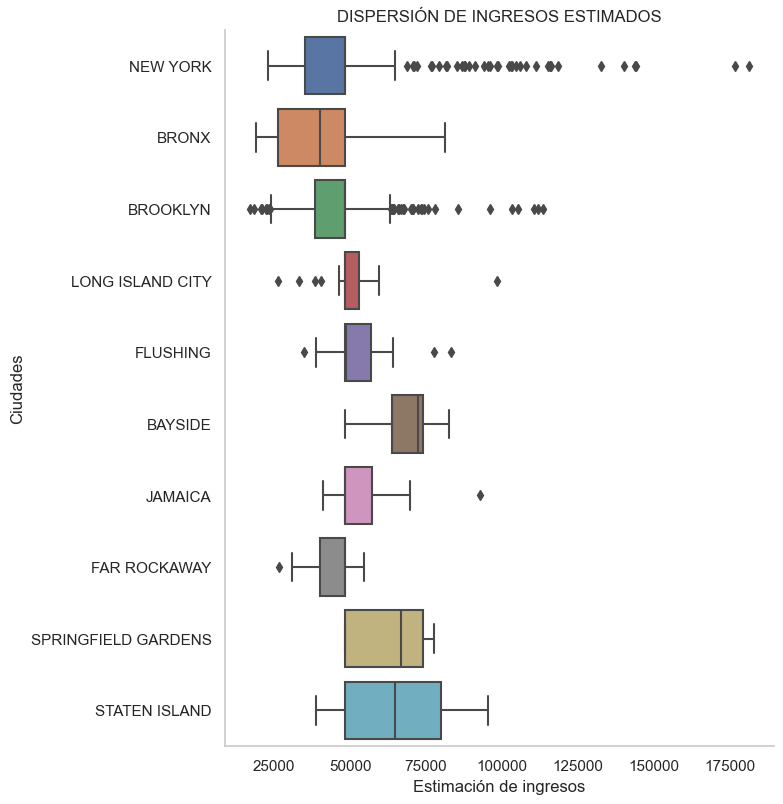

In [530]:
chart = sns.catplot(y="City", 
                    x="School Income Estimate", 
                    kind="box", 
                    data=df_schools_top_10, 
                    height=8
                    )

plt.grid(False)
plt.title('DISPERSIÓN DE INGRESOS ESTIMADOS')
chart.set_xlabels('Estimación de ingresos')
chart.set_ylabels('Ciudades');

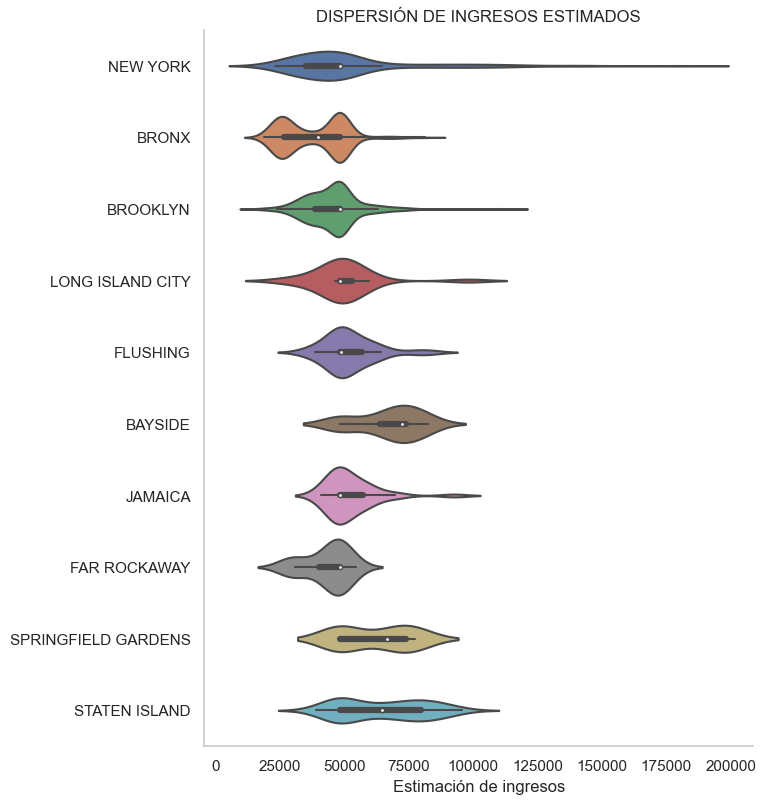

In [537]:
chart = sns.catplot(y="City", 
                    x="School Income Estimate", 
                    kind="violin", 
                    data=df_schools_top_10, 
                    height=8
                    ) # swarm violin

plt.grid(False)
plt.title('DISPERSIÓN DE INGRESOS ESTIMADOS')
chart.set_xlabels('Estimación de ingresos');
chart.set_ylabels('');

In [538]:
df_schools_top_10_income = df_schools_top_10.groupby('City')['School Income Estimate'].mean().sort_values(ascending=False)
df_schools_top_10_income

# BRONX, FAR ROCKAWAY, BROOKLYN y LONG ISLAND CITY no llegan a 50.000$ de ingreso medio.
# Por el contratio, estas ciudades tienen una media superior a 50.000$ de ingresos: BAYSIDE, STATEN ISLAND, SPRINGFIELD GARDENS, JAMAICA, FLUSHING y NEW YORK

City
BAYSIDE                67348.405037
STATEN ISLAND          64858.426482
SPRINGFIELD GARDENS    62031.436588
JAMAICA                52536.808857
FLUSHING               52374.670548
NEW YORK               52223.303356
LONG ISLAND CITY       49932.881331
BROOKLYN               46062.432746
FAR ROCKAWAY           43184.986228
BRONX                  38244.836994
Name: School Income Estimate, dtype: float64

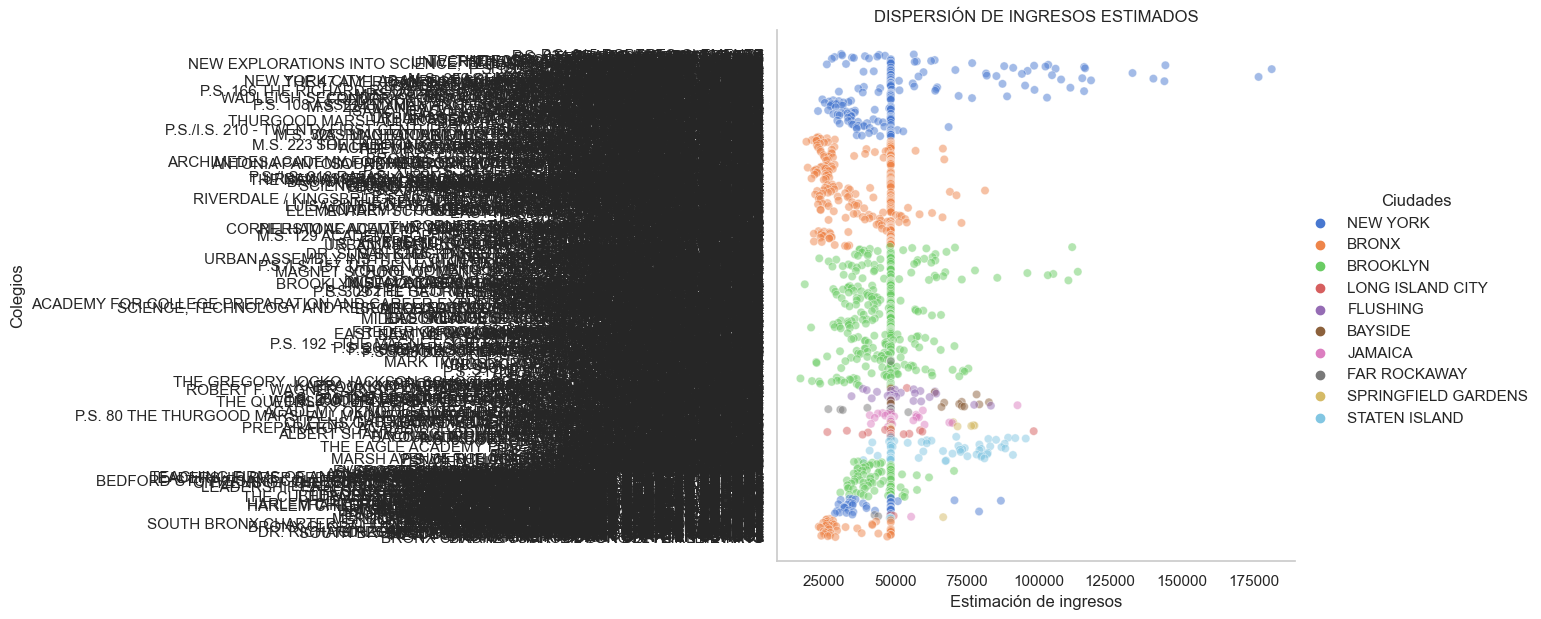

In [539]:
df_schools_top_10.rename(columns={'City':'Ciudades'}, inplace=True)

chart = sns.relplot(data=df_schools_top_10,
            y="School Name",
            x="School Income Estimate",
            hue="Ciudades", 
            #size="School Income Estimate",
            #sizes=(4, 300),
            alpha=.5, 
            palette="muted",
            height=6,
            kind="scatter"
            )

plt.grid(False)
plt.title('DISPERSIÓN DE INGRESOS ESTIMADOS')
chart.set_xlabels('Estimación de ingresos')
chart.set_ylabels('Colegios');

Observaciones:

10. Utilizando el dataset "D5 SHSAT Registrations and Testers.csv", ¿qué colegios registran más estudiantes en el examen? Existen diferencias con los colegios donde más estudiantes realmente se presentan? Utiliza gráficas.

In [275]:
df_registrations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 82 to 48
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   index                                            140 non-null    int64 
 1   DBN                                              140 non-null    object
 2   School name                                      140 non-null    object
 3   Year of SHST                                     140 non-null    int64 
 4   Grade level                                      140 non-null    int64 
 5   Enrollment on 10/31                              140 non-null    int64 
 6   Number of students who registered for the SHSAT  140 non-null    int64 
 7   Number of students who took the SHSAT            140 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 9.8+ KB


In [ ]:
# sns.catplot(x="Number of students who registered for the SHSAT", y="School name", hue="Year of SHST", data=df_registrations, kind='strip')
# sns.catplot(x="Number of students who took the SHSAT", y="School name", hue="Year of SHST", data=df_registrations, kind='strip');
# # “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”

In [540]:
df_regs_schools = df_registrations.groupby(['School name', 'DBN'], as_index=False).sum()
df_regs_schools = df_regs_schools[['School name', 'DBN',
                                'Enrollment on 10/31', 
                                'Number of students who registered for the SHSAT', 
                                'Number of students who took the SHSAT'
                                ]]
df_regs_schools = df_regs_schools.sort_values('Number of students who registered for the SHSAT', ascending=False)
#df_regs_schools

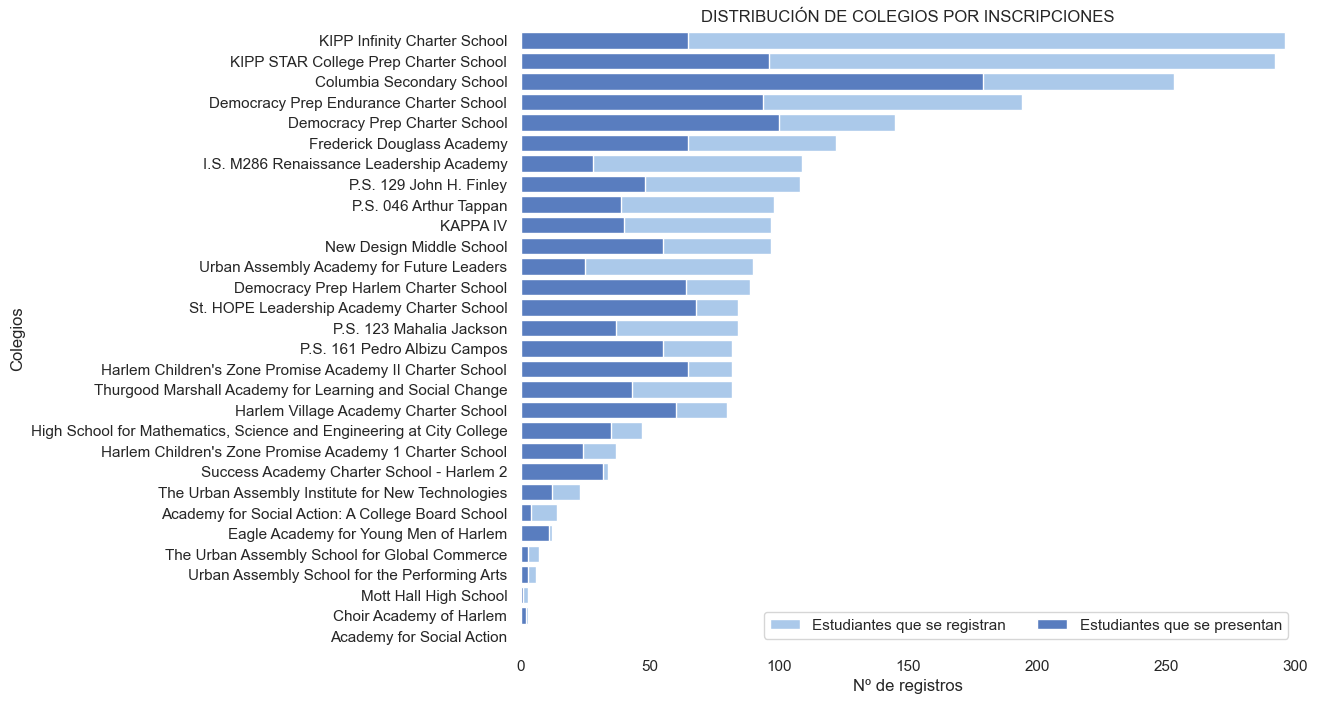

In [544]:
f, ax = plt.subplots(figsize=(10, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y="School name", data=df_regs_schools,
            label="Estudiantes que se registran", color="b", ci=None)

sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=df_regs_schools,
            label="Estudiantes que se presentan", color="b", ci=None)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="Colegios", title='DISTRIBUCIÓN DE COLEGIOS POR INSCRIPCIONES',
       xlabel="Nº de registros")
sns.despine(left=True, bottom=True)
plt.grid(False);

In [ ]:
df_regs_schools_race = pd.merge(df_regs_schools, df_schools_ini[['School Name', 'Location Code', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White',
                                                                'Percent Black / Hispanic', 'Percent Asian / White']],
                                left_on=['DBN'], right_on=['Location Code'])
df_regs_schools_race

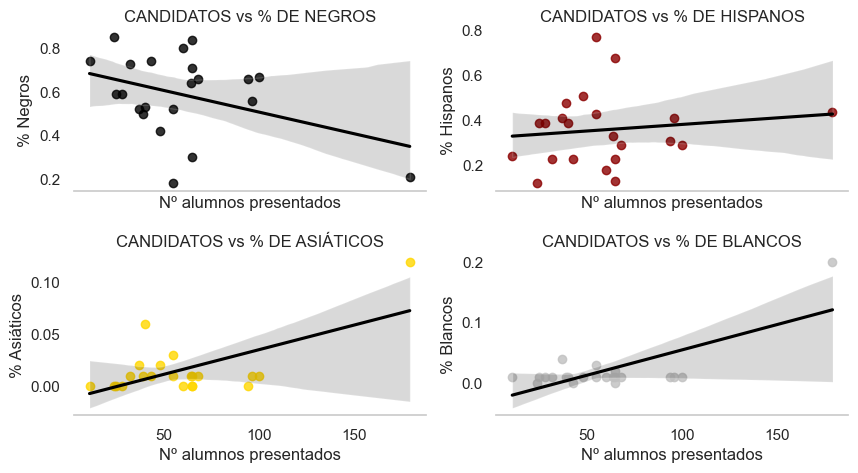

In [554]:
# Candidatos vs Porcentaje de Negros / Hispano

fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# sns.regplot(x=df_regs_schools_race["Percent Black"], y=df_regs_schools_race["Number of students who took the SHSAT"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
# sns.regplot(x=df_regs_schools_race["Percent Hispanic"], y=df_regs_schools_race["Number of students who took the SHSAT"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
# sns.regplot(x=df_regs_schools_race["Percent Asian"], y=df_regs_schools_race["Number of students who took the SHSAT"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
# sns.regplot(x=df_regs_schools_race["Percent White"], y=df_regs_schools_race["Number of students who took the SHSAT"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})


sns.regplot(x=df_regs_schools_race["Number of students who took the SHSAT"], y=df_regs_schools_race["Percent Black"], color='black', ax=ax[0, 0], line_kws={"color": "black"})
sns.regplot(x=df_regs_schools_race["Number of students who took the SHSAT"], y=df_regs_schools_race["Percent Hispanic"], color='darkRed', ax=ax[0, 1], line_kws={"color": "black"})
sns.regplot(x=df_regs_schools_race["Number of students who took the SHSAT"], y=df_regs_schools_race["Percent Asian"], color='gold', ax=ax[1, 0], line_kws={"color": "black"})
sns.regplot(x=df_regs_schools_race["Number of students who took the SHSAT"], y=df_regs_schools_race["Percent White"], color='silver', ax=ax[1, 1], line_kws={"color": "black"})

ax[0, 0].set_title('CANDIDATOS vs % DE NEGROS')
ax[0, 1].set_title('CANDIDATOS vs % DE HISPANOS')
ax[1, 0].set_title('CANDIDATOS vs % DE ASIÁTICOS')
ax[1, 1].set_title('CANDIDATOS vs % DE BLANCOS')

ax[0, 0].set_xlabel('Nº alumnos presentados')
ax[0, 0].set_ylabel('% Negros')

ax[0, 1].set_xlabel('Nº alumnos presentados')
ax[0, 1].set_ylabel('% Hispanos')

ax[1, 0].set_xlabel('Nº alumnos presentados')
ax[1, 0].set_ylabel('% Asiáticos')

ax[1, 1].set_xlabel('Nº alumnos presentados')
ax[1, 1].set_ylabel('% Blancos')

ax[0, 0].grid(False)
ax[0, 1].grid(False)
ax[1, 0].grid(False)
ax[1, 1].grid(False)

plt.subplots_adjust(hspace=0.4)

In [ ]:
df_regs_schools_geo = pd.merge(df_regs_schools, df_schools_ini[['School Name', 'Location Code', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White',
                                                                'Percent Black / Hispanic', 'Percent Asian / White', 'Latitude', 'Longitude']],
                                left_on=['DBN'], right_on=['Location Code'])
df_regs_schools_geo

In [ ]:
df_regs_schools_geo.plot(kind="scatter", 
                    x="Longitude", 
                    y="Latitude", 
                    s=df_regs_schools_geo['Number of students who took the SHSAT'], # Tamaño de los puntos en base al valor del campo
                    #c="Percent Black / Hispanic", # Color de los puntos en base al valor del campo
                    cmap=plt.get_cmap("jet"), 
                    label='Colegios', 
                    title='COLEGIOS - REGISTRADOS',
                    #colorbar=True, 
                    alpha=0.4, 
                    figsize=(15,7), 
                    xlabel="Longitud",
                    ylabel="Latitud",
                    grid=False
                    )

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)

sns.regplot(x=df_regs_schools_race["Percent Black / Hispanic"], 
            y=df_regs_schools_race["Number of students who took the SHSAT"], 
            color='tomato', 
            line_kws={"color": "black"}
            )

ax.set_title('Candidatos vs Porcentaje de Negros / Hispanos')
ax.set_ylabel('Nº de estudiantes que se presentan')
ax.set_xlabel('Procentaje Negros / Hispanos');

Observaciones:

Por tanto, nos encontramos ante la siguiente problemática:
1. Bajo número de estudiantes negros y latinos en centros de especialización
2. Sólo el 10% de los colegios de Nueva York reciben ofertas de centros de especialización, aún habiendo un 67% de estudiantes negros y latinos en Nueva York.
3. Los asiáticos suponen un 62% de los estudiantes de los centros de especialización, aún habiendo únicamente un 16% de estudiantes asiáticos en los colegios.
4. Los blancos suponen un 24% de los estudiantes de los centros de especialización, aún habiendo únicamente un 15% de estudiantes blancos en los colegios.


Por tanto, consideraremos las siguientes hipótesis que habrá que razonar con los datos disponibles:
1. Si un colegio pertenece o no a una comunidad tiene impacto en las ayudas económicas recibidas.
2. Hay centros con mayoría de estudiantes hispanos o negros que tienen más necesidades económicas que los centros con mayoría de raza blanca.
3. La localización de los colegios está afectando a las ayudas.
4. Los centros con mayores necesidades tienen un % de asistencia a clase más bajo.

11. Escribe en un README.md las conclusiones finales del análisis:
    * Contexto del análisis y pasos realizados.
    * Validación de las hipótesis.
    * Futuros pasos.



12. Crea una presentación donde resumas el trabajo realizado del EDA en un power point o herramienta similar. El lunes 23 realizarás una presentación a los profesores por google meet a las 16.00.

13. Sube tu trabajo a un repositorio de github:
    * Este jupyter con los apartados resueltos.
    * El README.md
    * Todos los recursos necesarios para el EDA: ficheros, scripts, notebooks, imagenes,... 
    * La presentación

14. Sube al classroom el repositorio. Fecha límite lunes 23 de enero a las 9.00h. 